# 선형회귀 월급 예측

In [2]:
import matplotlib.pyplot as plt
# plt.style.use(['dark_background'])

#### 목표: 여러가지 feature들로 여성 월급 예측하기
- 15세 아버지 직업, 아버지 최종학력, 15세 가정 형편, 15세 부모님 관계,\
  연령, 학력, 결혼경험, 고등학교 종류, 대학전공, 대학소재지, \
  일자리구분(정규/비정규), 직위, 직장종류, 사업체 직원 수, 경력 -> 월 급여

> test : 15세 가정환경, 나이, 학력, 결혼여부 로 예측해보기

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly_express as px

In [4]:
# 컬럼 재설정 
data = pd.read_csv('./data/data_1ver.200812.csv', sep=',', encoding = 'euc-kr')
data.columns = ['case', 'ID', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age',
       'edu', 'marry_YN', 'JOBSAL']
data_1 = data.copy()
data_1 = data_1[1:]
data_1.tail()

case       ID fa_job fa_edu life_15 fama_rel_15 age edu marry_YN JOBSAL
25312    7  6204402      7      3       3           3  51   7        1    180
25313    6  6204502      6      2       3           2  41   4        1    150
25314    7  6204502      6      2       3           2  43   4        1    170
25315    6  6204901      6      2       3           2  61   2        1     60
25316    7  6204901      6      2       3           2  63   2        1     60

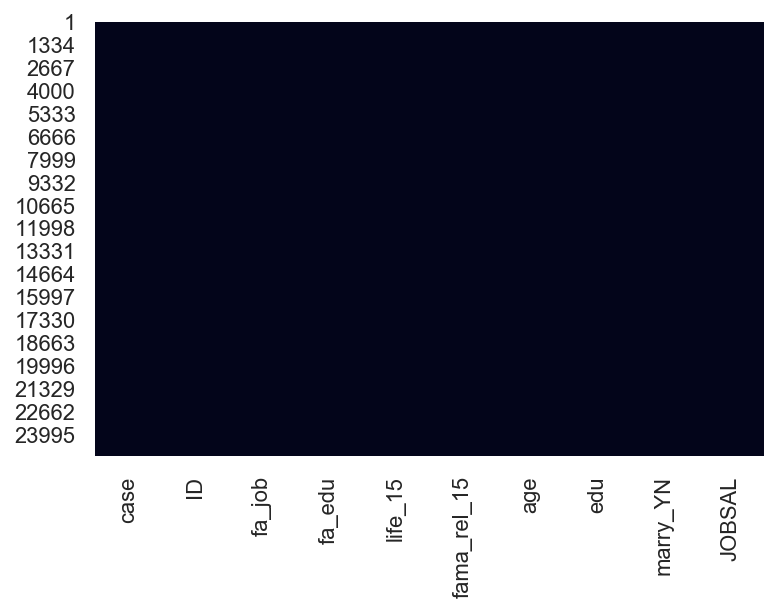

In [5]:
sns.heatmap(data_1.isnull(), cbar=False)

In [6]:
data_1 = data_1.astype("int") 

### 아버지 직업 거절/무응답자 57명 0으로 변경 
#### 아빠 직업은 영향이 적어서 이 문항에 응답한 응답자를 drop 시킬 필요는 없음.

In [7]:
data_1[data_1["fa_job"] <= 0]["fa_job"].value_counts()

-9    53
-8     4
Name: fa_job, dtype: int64

In [8]:
data_1["fa_job"] = data_1["fa_job"].replace(-8,0).replace(-9,0)

In [9]:
data_1["fa_job"].value_counts()

6     10568
3      2440
7      2347
5      2279
12     1833
4      1259
9      1205
1      1078
2      1033
8       599
11      403
10      215
0        57
Name: fa_job, dtype: int64

### =============================================================================================

In [10]:
# 여기서 잠깐~!
# 아빠 직업, 15세 환경, 15세 관계, 학력 무응답자랑 0이라고 응답한 사람이 있는데 
# 아님 이건 그냥 test로 해보는 거니까 0으로 위랑 똑같이 바꿀까여?? drop 할까여??

In [11]:
data_1[data_1["fa_edu"] <= 0]["fa_edu"].value_counts()

 0    1491
-9      75
-8       4
Name: fa_edu, dtype: int64

In [12]:
data_1[data_1["life_15"] <= 0]["life_15"].value_counts()

-9    12
Name: life_15, dtype: int64

In [13]:
data_1[data_1["fama_rel_15"] <= 0]["fama_rel_15"].value_counts()

-9    55
Name: fama_rel_15, dtype: int64

In [14]:
data_1[data_1["edu"] <= 0]["edu"].value_counts()

-9    10
Name: edu, dtype: int64

### ============================================================================================

In [15]:
# 월급의 분포 확인하기 
fig = px.histogram(data_1, x='JOBSAL')
fig.show()

In [16]:
data_1["JOBSAL"].describe()

count    25316.000000
mean       156.508058
std        110.497297
min         10.000000
25%         90.000000
50%        140.000000
75%        200.000000
max       5000.000000
Name: JOBSAL, dtype: float64

In [17]:
# 이상치 -> 월급 5000 삭제
data_1[data_1['JOBSAL'] == 5000]

case      ID  fa_job  fa_edu  life_15  fama_rel_15  age  edu  marry_YN  \
11265     1  436601       6       1        1            2   55    7         1   

       JOBSAL  
11265    5000

In [18]:
data_1.drop(index=11265, inplace=True)

In [19]:
# 특징별 종속변수(월급) 관계 시각화

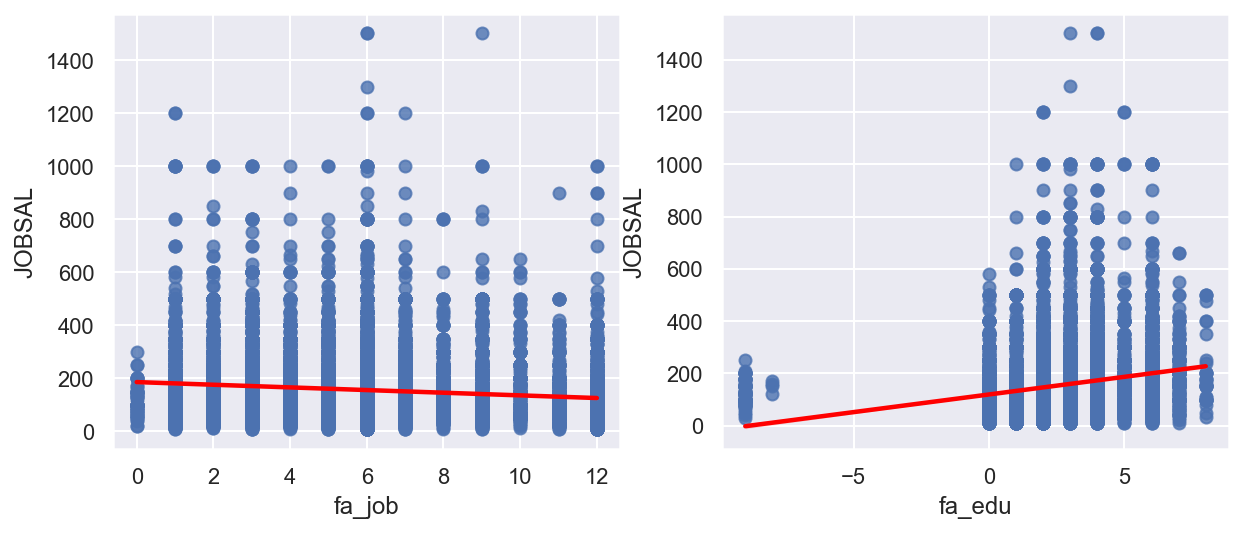

In [20]:
# 아버지 직업, 아버지 교육정도 : 월급
plt.figure(figsize=(10, 4))
plt.subplot(121)
sns.regplot(x="fa_job", y='JOBSAL', data=data_1, line_kws={'color':'red'})
plt.subplot(122)
sns.regplot(x="fa_edu", y='JOBSAL', data=data_1, line_kws={'color':'red'})

plt.show()

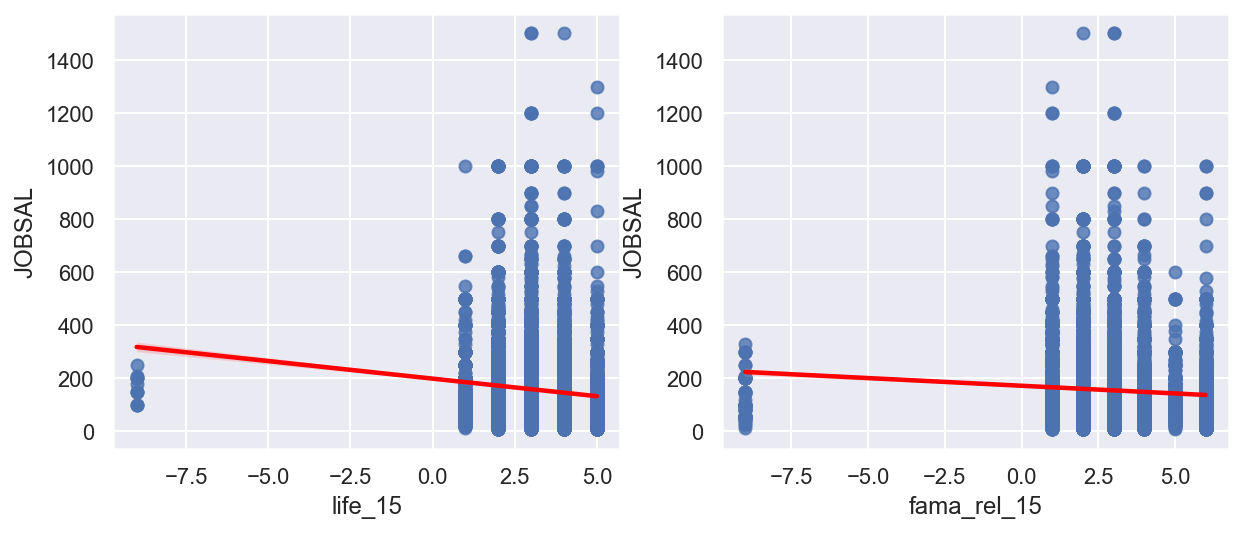

In [21]:
# 15세 생활정도, 15세 부모님관계 : 월급
plt.figure(figsize=(10, 4))
plt.subplot(121)
sns.regplot(x="life_15", y='JOBSAL', data=data_1, line_kws={'color':'red'})
plt.subplot(122)
sns.regplot(x="fama_rel_15", y='JOBSAL', data=data_1, line_kws={'color':'red'})

plt.show()

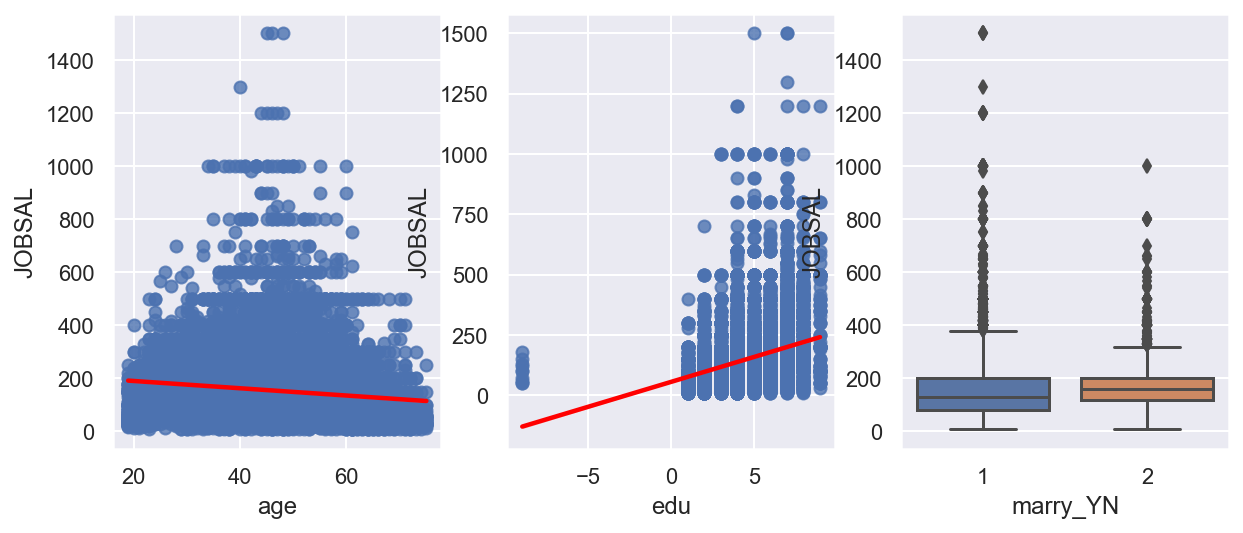

In [22]:
# 나이, 학력, 결혼유무 : 월급
plt.figure(figsize=(10, 4))
plt.subplot(131)
sns.regplot(x="age", y='JOBSAL', data=data_1, line_kws={'color':'red'})
plt.subplot(132)
sns.regplot(x="edu", y='JOBSAL', data=data_1, line_kws={'color':'red'})
plt.subplot(133)
sns.boxplot(x="marry_YN", y='JOBSAL', data=data_1)


plt.show()

In [23]:
# OLS 로 R, coef, p 값 확인
X = data_1[data_1.columns.drop(['JOBSAL', 'case', 'ID'])]
y = data_1["JOBSAL"]

In [24]:
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()

In [25]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 JOBSAL   R-squared (uncentered):                   0.727
Model:                            OLS   Adj. R-squared (uncentered):              0.727
Method:                 Least Squares   F-statistic:                              9615.
Date:                Sat, 29 Aug 2020   Prob (F-statistic):                        0.00
Time:                        23:22:45   Log-Likelihood:                     -1.5219e+05
No. Observations:               25315   AIC:                                  3.044e+05
Df Residuals:                   25308   BIC:                                  3.045e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [26]:
# 아빠직업(6: 농림어업 숙련 종사자), 아빠교육정도(3: 중학교), 
# 15세 생활정도(2: 대체로 잘 사는 편이었다), 15세 부모님관계(1: 아주 좋은 편이었다)
# 나이(37세), 학력(7: 4년제 대학), 결혼여부(1: 있다)
results.predict([[6, 3, 2, 1, 37, 7, 1]])

array([199.31650941])

### 회귀 프로젝트 진행 가능하다고 판단 !! 

# <span style="color:red">start</span>

# 전체 데이터로 월급 예측하기

> #### 월급에 있어서 경력은 매우 중요한 요소라고 생각 -> 경력 컬럼 추가!
- **정확한 경력은 알 수없어 임의로 계산하기로 결정함**

#### 첫직장 입직/퇴직/유지여부, 이전직장 입직/퇴직 컬럼 추가함
- 각 시점이 없는 데이터가 많았음. 
    1. 각 입직 시점이 없는 경우 -> drop : 계산 불가능
    2. 첫직장 퇴직시점이 없는경우
        - 첫직장 유지 O -> 마지막 조사 차수 시기로 대체 
        - 첫직장 유지 X -> 이전직장 퇴직 시점으로 대체 
    3. 이전직장 퇴직시점이 없는 경우 -> 임의로 마지막 조사한 차수의 시기로 채워넣기로 함  

In [27]:
data = pd.read_csv('./data/데이터_초안_0812.csv', sep=',', encoding = 'euc-kr')
data
# 조사회차	패널ID	15세 아버지 직업	아버지 최종학력	15세 가정 형편	15세 부모님 관계	연령	학력	
# 결혼경험	고등학교 종류	대학전공	대학소재지	일자리구분(정규/비정규)	직위	직장종류	사업체 직원 수	
# 월 급여	첫 직장입직	첫 직장 퇴직	첫직장 유지	새로운 일자리 입직	하던일 퇴직	최근 일자리 그만둔 시점	
# 이전일자리 입직	이전일자리 퇴직

data.columns = ['case', 'ID', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age', 'edu', 
                'marry_YN','hschool','univ_mjor', 'univ_area', 'jung_bi', 'level', 'j_type', 'job_pp', 
                'JOBSAL', 'job_1_in', 'job_1_out', 'job_1_keep', 'njob_in', 'njob_out', 'rjob_out', 
                'pjob_in', 'pjob_out']
data_1 = data.copy()
data_1 = data_1[2:]
data_1.tail()

C:\Users\eunice\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning:

Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24) have mixed types.Specify dtype option on import or set low_memory=False.



case       ID fa_job fa_edu life_15 fama_rel_15 age edu marry_YN  \
62423    6  6204702      6      1       3           2  59   4        1   
62424    7  6204702      6      1       3           2  61   4        1   
62425    6  6204802      6      2       4           2  53   4        1   
62426    6  6204901      6      2       3           2  61   2        1   
62427    7  6204901      6      2       3           2  63   2        1   

      hschool  ... job_pp JOBSAL job_1_in job_1_out job_1_keep njob_in  \
62423       3  ...    NaN      0     1976      1978          2     NaN   
62424     NaN  ...    NaN      0      NaN       NaN        NaN     NaN   
62425       3  ...    NaN      0     1984       NaN          1     NaN   
62426     NaN  ...    NaN     60     1977       NaN          1    1978   
62427     NaN  ...    NaN     60      NaN       NaN        NaN     NaN   

      njob_out rjob_out pjob_in pjob_out  
62423      NaN      NaN     NaN      NaN  
62424      NaN      NaN     NaN      NaN  
62425      NaN      NaN     NaN      NaN  
62426      NaN      NaN     NaN      NaN  
62427      NaN      NaN     NaN      NaN  

[5 rows x 25 columns]

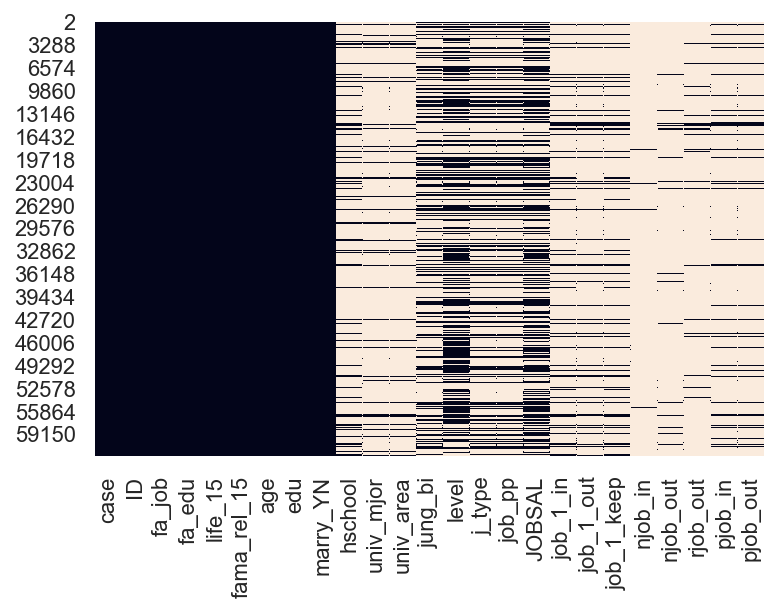

In [28]:
# 오 마이 갓 결측치 파티~ ㅎㅁㅎ
# 종속변수인 월급 ['JOBSAL'] 먼저 해결
sns.heatmap(data_1.isnull(), cbar=False)

In [29]:
data_1['JOBSAL'].isnull().value_counts()

True     33029
False    29397
Name: JOBSAL, dtype: int64

In [30]:
data_1.drop(data_1[data_1['JOBSAL'].isnull()].index, inplace=True)

In [31]:
data_1[data_1['JOBSAL'] == 0]['JOBSAL'].value_counts()

0.0    2942
Name: JOBSAL, dtype: int64

In [32]:
data_1.drop(data_1[data_1['JOBSAL'] == 0].index, inplace=True)

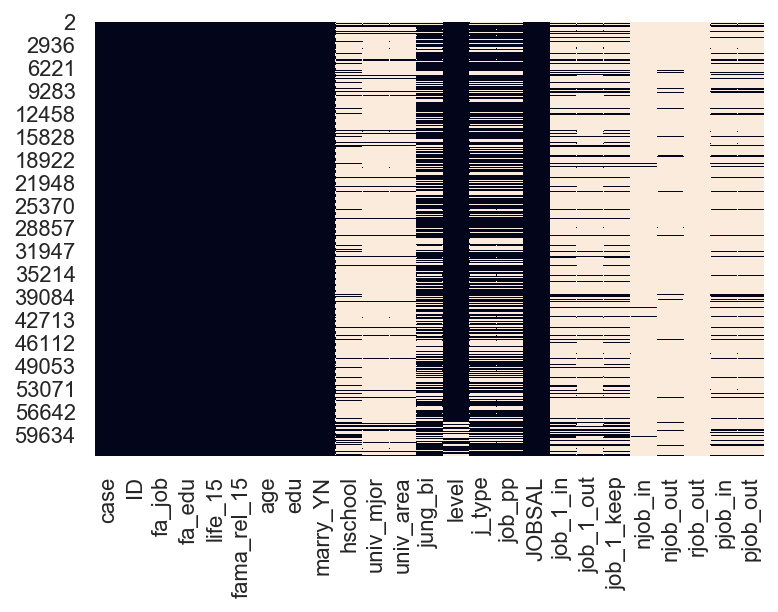

In [33]:
sns.heatmap(data_1.isnull(), cbar=False)

In [34]:
data_1 = data_1.replace('', np.nan)
data_1 = data_1.astype("float")
data_1.reset_index(inplace=True, drop=True)
data_1.tail()

case         ID  fa_job  fa_edu  life_15  fama_rel_15   age  edu  \
26450   7.0  6204402.0     7.0     3.0      3.0          3.0  51.0  7.0   
26451   6.0  6204502.0     6.0     2.0      3.0          2.0  41.0  4.0   
26452   7.0  6204502.0     6.0     2.0      3.0          2.0  43.0  4.0   
26453   6.0  6204901.0     6.0     2.0      3.0          2.0  61.0  2.0   
26454   7.0  6204901.0     6.0     2.0      3.0          2.0  63.0  2.0   

       marry_YN  hschool  ...  job_pp  JOBSAL  job_1_in  job_1_out  \
26450       1.0      NaN  ...     4.0   180.0       NaN        NaN   
26451       1.0      3.0  ...     3.0   150.0    1993.0     2014.0   
26452       1.0      NaN  ...     4.0   170.0       NaN        NaN   
26453       1.0      NaN  ...     NaN    60.0    1977.0        NaN   
26454       1.0      NaN  ...     NaN    60.0       NaN        NaN   

       job_1_keep  njob_in  njob_out  rjob_out  pjob_in  pjob_out  
26450         NaN      NaN       NaN       NaN      NaN       NaN  
26451         2.0      NaN       NaN       NaN      NaN       NaN  
26452         NaN      NaN       NaN       NaN      NaN       NaN  
26453         1.0   1978.0       NaN       NaN      NaN       NaN  
26454         NaN      NaN       NaN       NaN      NaN       NaN  

[5 rows x 25 columns]

In [35]:
# 첫 직장 입직년도를 1990년도 이후로 선별
data_1_1990 = data_1[data_1['job_1_in']>=1990]
data_1_1990.reset_index(drop=True)

case         ID  fa_job  fa_edu  life_15  fama_rel_15   age  edu  \
0      1.0      702.0     7.0     2.0      5.0          2.0  35.0  4.0   
1      1.0      802.0     3.0     4.0      3.0          3.0  33.0  7.0   
2      1.0     1002.0     5.0     4.0      3.0          2.0  33.0  7.0   
3      1.0     1202.0     5.0     3.0      3.0          2.0  32.0  4.0   
4      1.0     1302.0     4.0     4.0      3.0          2.0  27.0  4.0   
...    ...        ...     ...     ...      ...          ...   ...  ...   
2635   6.0  6203301.0     4.0     4.0      4.0          3.0  47.0  5.0   
2636   6.0  6203501.0     6.0     3.0      3.0          2.0  57.0  5.0   
2637   6.0  6204202.0     6.0     2.0      4.0          3.0  42.0  4.0   
2638   6.0  6204303.0     7.0     4.0      3.0          2.0  28.0  8.0   
2639   6.0  6204502.0     6.0     2.0      3.0          2.0  41.0  4.0   

      marry_YN  hschool  ...  job_pp  JOBSAL  job_1_in  job_1_out  job_1_keep  \
0          1.0      3.0  ...     6.0   250.0    1990.0     1991.0         2.0   
1          1.0      1.0  ...     4.0   167.0    1995.0     1997.0         2.0   
2          1.0      1.0  ...     NaN   200.0    1997.0     1999.0         2.0   
3          1.0      3.0  ...     NaN   200.0    1994.0     1997.0         2.0   
4          1.0      3.0  ...     1.0   150.0    1999.0     2001.0         2.0   
...        ...      ...  ...     ...     ...       ...        ...         ...   
2635       1.0      1.0  ...     4.0   100.0    2007.0        NaN         1.0   
2636       1.0      1.0  ...     4.0    60.0    2013.0        NaN         1.0   
2637       1.0      3.0  ...     1.0    60.0    1994.0     1999.0         2.0   
2638       2.0      1.0  ...     3.0   250.0    2011.0     2014.0         2.0   
2639       1.0      3.0  ...     3.0   150.0    1993.0     2014.0         2.0   

      njob_in  njob_out  rjob_out  pjob_in  pjob_out  
0         NaN       NaN       NaN   1992.0    1993.0  
1         NaN       NaN       NaN   1998.0    1999.0  
2         NaN       NaN       NaN   1997.0    1999.0  
3         NaN       NaN       NaN   1994.0    1997.0  
4         NaN       NaN       NaN   1999.0    2001.0  
...       ...       ...       ...      ...       ...  
2635      NaN       NaN       NaN      NaN       NaN  
2636      NaN       NaN       NaN      NaN       NaN  
2637      NaN    1999.0       NaN   2014.0    2015.0  
2638      NaN       NaN       NaN   2011.0    2014.0  
2639      NaN       NaN       NaN      NaN       NaN  

[2640 rows x 25 columns]

In [36]:
# 나이를 60세 이하로 선별
data_1_1990_age = data_1_1990[data_1_1990['age'] <= 60]
data_1_1990_age.reset_index(drop=True)

case         ID  fa_job  fa_edu  life_15  fama_rel_15   age  edu  \
0      1.0      702.0     7.0     2.0      5.0          2.0  35.0  4.0   
1      1.0      802.0     3.0     4.0      3.0          3.0  33.0  7.0   
2      1.0     1002.0     5.0     4.0      3.0          2.0  33.0  7.0   
3      1.0     1202.0     5.0     3.0      3.0          2.0  32.0  4.0   
4      1.0     1302.0     4.0     4.0      3.0          2.0  27.0  4.0   
...    ...        ...     ...     ...      ...          ...   ...  ...   
2585   6.0  6203301.0     4.0     4.0      4.0          3.0  47.0  5.0   
2586   6.0  6203501.0     6.0     3.0      3.0          2.0  57.0  5.0   
2587   6.0  6204202.0     6.0     2.0      4.0          3.0  42.0  4.0   
2588   6.0  6204303.0     7.0     4.0      3.0          2.0  28.0  8.0   
2589   6.0  6204502.0     6.0     2.0      3.0          2.0  41.0  4.0   

      marry_YN  hschool  ...  job_pp  JOBSAL  job_1_in  job_1_out  job_1_keep  \
0          1.0      3.0  ...     6.0   250.0    1990.0     1991.0         2.0   
1          1.0      1.0  ...     4.0   167.0    1995.0     1997.0         2.0   
2          1.0      1.0  ...     NaN   200.0    1997.0     1999.0         2.0   
3          1.0      3.0  ...     NaN   200.0    1994.0     1997.0         2.0   
4          1.0      3.0  ...     1.0   150.0    1999.0     2001.0         2.0   
...        ...      ...  ...     ...     ...       ...        ...         ...   
2585       1.0      1.0  ...     4.0   100.0    2007.0        NaN         1.0   
2586       1.0      1.0  ...     4.0    60.0    2013.0        NaN         1.0   
2587       1.0      3.0  ...     1.0    60.0    1994.0     1999.0         2.0   
2588       2.0      1.0  ...     3.0   250.0    2011.0     2014.0         2.0   
2589       1.0      3.0  ...     3.0   150.0    1993.0     2014.0         2.0   

      njob_in  njob_out  rjob_out  pjob_in  pjob_out  
0         NaN       NaN       NaN   1992.0    1993.0  
1         NaN       NaN       NaN   1998.0    1999.0  
2         NaN       NaN       NaN   1997.0    1999.0  
3         NaN       NaN       NaN   1994.0    1997.0  
4         NaN       NaN       NaN   1999.0    2001.0  
...       ...       ...       ...      ...       ...  
2585      NaN       NaN       NaN      NaN       NaN  
2586      NaN       NaN       NaN      NaN       NaN  
2587      NaN    1999.0       NaN   2014.0    2015.0  
2588      NaN       NaN       NaN   2011.0    2014.0  
2589      NaN       NaN       NaN      NaN       NaN  

[2590 rows x 25 columns]

> ### 경력 계산하기

In [37]:
# 첫직장 퇴직시점에 na값이 1245개 발견
data_1_1990_age = data_1_1990_age.fillna(0)
np.unique(data_1_1990_age['job_1_out'], return_counts=True)

(array([  -9.,    0., 1990., 1991., 1992., 1993., 1994., 1995., 1996.,
        1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
        2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
        2015., 2016., 2017., 2018.]),
 array([  13, 1201,   11,   24,   55,   67,   81,   94,   80,   80,   66,
          90,   70,   70,   81,   81,   73,   72,   68,   52,   29,   16,
          23,   14,   19,   19,   17,   12,    8,    3,    1], dtype=int64))

In [38]:
# 첫 직장 유지여부 확인하여 첫직장 퇴직연도 넣어주기
data_1_1990_age['job_1_out_2'] = np.where(data_1_1990_age['job_1_keep'] == 1, data_1_1990_age['case'],
                                          (np.where( data_1_1990_age['job_1_out'] != 0 , data_1_1990_age['job_1_out'],
                                                   data_1_1990_age['pjob_out'])))

In [39]:
# 첫직장 유지할 경우 마지막 조사차수를 퇴직년도로 넣기
data_1_1990_age['job_1_out_2'] = data_1_1990_age['job_1_out_2']\
.replace(1, 2007).replace(2, 2008).replace(3, 2010).replace(4, 2012)\
.replace(5, 2014).replace(6, 2016).replace(7, 2018)

data_1_1990_age.reset_index(drop=True).tail()

case         ID  fa_job  fa_edu  life_15  fama_rel_15   age  edu  \
2585   6.0  6203301.0     4.0     4.0      4.0          3.0  47.0  5.0   
2586   6.0  6203501.0     6.0     3.0      3.0          2.0  57.0  5.0   
2587   6.0  6204202.0     6.0     2.0      4.0          3.0  42.0  4.0   
2588   6.0  6204303.0     7.0     4.0      3.0          2.0  28.0  8.0   
2589   6.0  6204502.0     6.0     2.0      3.0          2.0  41.0  4.0   

      marry_YN  hschool  ...  JOBSAL  job_1_in  job_1_out  job_1_keep  \
2585       1.0      1.0  ...   100.0    2007.0        0.0         1.0   
2586       1.0      1.0  ...    60.0    2013.0        0.0         1.0   
2587       1.0      3.0  ...    60.0    1994.0     1999.0         2.0   
2588       2.0      1.0  ...   250.0    2011.0     2014.0         2.0   
2589       1.0      3.0  ...   150.0    1993.0     2014.0         2.0   

      njob_in  njob_out  rjob_out  pjob_in  pjob_out  job_1_out_2  
2585      0.0       0.0       0.0      0.0       0.0       2016.0  
2586      0.0       0.0       0.0      0.0       0.0       2016.0  
2587      0.0    1999.0       0.0   2014.0    2015.0       1999.0  
2588      0.0       0.0       0.0   2011.0    2014.0       2014.0  
2589      0.0       0.0       0.0      0.0       0.0       2014.0  

[5 rows x 26 columns]

In [40]:
# 패널별 마지막 조사차수로 정렬
ata_1_1990_age = data_1_1990_age.groupby("ID").max()
data_1_1990_age.reset_index(drop=True).tail()

case         ID  fa_job  fa_edu  life_15  fama_rel_15   age  edu  \
2585   6.0  6203301.0     4.0     4.0      4.0          3.0  47.0  5.0   
2586   6.0  6203501.0     6.0     3.0      3.0          2.0  57.0  5.0   
2587   6.0  6204202.0     6.0     2.0      4.0          3.0  42.0  4.0   
2588   6.0  6204303.0     7.0     4.0      3.0          2.0  28.0  8.0   
2589   6.0  6204502.0     6.0     2.0      3.0          2.0  41.0  4.0   

      marry_YN  hschool  ...  JOBSAL  job_1_in  job_1_out  job_1_keep  \
2585       1.0      1.0  ...   100.0    2007.0        0.0         1.0   
2586       1.0      1.0  ...    60.0    2013.0        0.0         1.0   
2587       1.0      3.0  ...    60.0    1994.0     1999.0         2.0   
2588       2.0      1.0  ...   250.0    2011.0     2014.0         2.0   
2589       1.0      3.0  ...   150.0    1993.0     2014.0         2.0   

      njob_in  njob_out  rjob_out  pjob_in  pjob_out  job_1_out_2  
2585      0.0       0.0       0.0      0.0       0.0       2016.0  
2586      0.0       0.0       0.0      0.0       0.0       2016.0  
2587      0.0    1999.0       0.0   2014.0    2015.0       1999.0  
2588      0.0       0.0       0.0   2011.0    2014.0       2014.0  
2589      0.0       0.0       0.0      0.0       0.0       2014.0  

[5 rows x 26 columns]

In [41]:
# 기존 첫직장 퇴직 컬럼 삭제
data_1_1990_age= data_1_1990_age.drop("job_1_out", axis=1) 

In [42]:
data_1_1990_age.columns

Index(['case', 'ID', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age',
       'edu', 'marry_YN', 'hschool', 'univ_mjor', 'univ_area', 'jung_bi',
       'level', 'j_type', 'job_pp', 'JOBSAL', 'job_1_in', 'job_1_keep',
       'njob_in', 'njob_out', 'rjob_out', 'pjob_in', 'pjob_out',
       'job_1_out_2'],
      dtype='object')

In [43]:
# 컬럼 위치 재정비
data_1_1990_age = data_1_1990_age[['case', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age', 'edu',
       'marry_YN', 'hschool', 'univ_mjor', 'univ_area', 'jung_bi', 'level',
       'j_type', 'job_pp', 'job_1_in', 'job_1_out_2', 'job_1_keep', 'njob_in',
       'njob_out', 'rjob_out', 'pjob_in', 'pjob_out', 'JOBSAL',]]

In [44]:
# 첫직장 퇴직년도 입력 확인
np.unique(data_1_1990_age['job_1_out_2'], return_counts = True)

(array([  -9., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
        1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
        2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
        2016., 2017., 2018.]),
 array([ 13,  11,  24,  55,  67,  81,  95,  80,  80,  66,  90,  70,  70,
         81,  81,  73,  72,  68, 624,  84,  16, 102,  14,  66,  19,  58,
         12, 363,   3,  52], dtype=int64))

In [45]:
# 경력 컬럼 추가 -> working_y
data_1_1990_age['working_y']=" "
data_1_1990_age.reset_index(drop=True).tail()

case  fa_job  fa_edu  life_15  fama_rel_15   age  edu  marry_YN  \
2585   6.0     4.0     4.0      4.0          3.0  47.0  5.0       1.0   
2586   6.0     6.0     3.0      3.0          2.0  57.0  5.0       1.0   
2587   6.0     6.0     2.0      4.0          3.0  42.0  4.0       1.0   
2588   6.0     7.0     4.0      3.0          2.0  28.0  8.0       2.0   
2589   6.0     6.0     2.0      3.0          2.0  41.0  4.0       1.0   

      hschool  univ_mjor  ...  job_1_in  job_1_out_2  job_1_keep  njob_in  \
2585      1.0        0.0  ...    2007.0       2016.0         1.0      0.0   
2586      1.0        0.0  ...    2013.0       2016.0         1.0      0.0   
2587      3.0        0.0  ...    1994.0       1999.0         2.0      0.0   
2588      1.0       12.0  ...    2011.0       2014.0         2.0      0.0   
2589      3.0        0.0  ...    1993.0       2014.0         2.0      0.0   

      njob_out  rjob_out  pjob_in  pjob_out  JOBSAL  working_y  
2585       0.0       0.0      0.0       0.0   100.0             
2586       0.0       0.0      0.0       0.0    60.0             
2587    1999.0       0.0   2014.0    2015.0    60.0             
2588       0.0       0.0   2011.0    2014.0   250.0             
2589       0.0       0.0      0.0       0.0   150.0             

[5 rows x 25 columns]

In [46]:
# 첫직장을 유지하지 않은 사람들의 퇴직년도가 입력되지않아서 분류해서 추가 
keep1 = data_1_1990_age[data_1_1990_age['job_1_keep']==1]
keep2 = data_1_1990_age[data_1_1990_age['job_1_keep']==2]

In [47]:
# 행별 계산이 가능한지 test
keep1['working_y'].values[1] = keep1['job_1_out_2'].values[1] - keep1['job_1_in'].values[1]
keep1.head()

case  fa_job  fa_edu  life_15  fama_rel_15   age  edu  marry_YN  hschool  \
61    1.0     5.0     4.0      3.0          2.0  32.0  6.0       1.0      1.0   
101   4.0     2.0     6.0      3.0          4.0  19.0  5.0       2.0      1.0   
104   5.0     8.0     4.0      3.0          3.0  19.0  4.0       2.0      3.0   
115   4.0     7.0     3.0      3.0          3.0  19.0  4.0       2.0      3.0   
140   3.0     7.0     3.0      4.0          3.0  25.0  7.0       2.0      1.0   

     univ_mjor  ...  job_1_in  job_1_out_2  job_1_keep  njob_in  njob_out  \
61         7.0  ...    1997.0       2007.0         1.0      0.0       0.0   
101        0.0  ...    2011.0       2012.0         1.0      0.0       0.0   
104        0.0  ...    2014.0       2014.0         1.0      0.0       0.0   
115        0.0  ...    2011.0       2012.0         1.0      0.0       0.0   
140        1.0  ...    2010.0       2010.0         1.0      0.0       0.0   

     rjob_out  pjob_in  pjob_out  JOBSAL  working_y  
61        0.0      0.0       0.0   180.0             
101       0.0      0.0       0.0    32.0          1  
104       0.0      0.0       0.0   100.0             
115       0.0      0.0       0.0   220.0             
140       0.0   2009.0    2010.0   130.0             

[5 rows x 25 columns]

In [48]:
# case 1 : 첫직장을 유지
# -> 첫직장 입직/퇴직으로 총 경력계산 가능
for i in range(len(keep1['job_1_out_2'])):
    keep1['working_y'].values[i] = keep1['job_1_out_2'].values[i] - keep1['job_1_in'].values[i]
    i += 1
    print("종료", end="\t")

종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종

In [49]:
np.unique(keep1['working_y'], return_counts=True)

(array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0,
        12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0,
        23.0, 24.0, 25.0, 26.0], dtype=object),
 array([ 17, 240, 140, 120,  78,  76,  78,  53,  61,  41,  42,  28,  26,
         32,  29,  26,  25,  29,  21,   8,   4,   3,   5,   5,   1,   6,
          1,   6], dtype=int64))

In [50]:
# case 2 : 첫직장을 유지하지 않을 경우
# -> 첫직장 퇴직이 이전직장 퇴직과 같을 경우 -> 이전직장 경력
# -> 첫직장 퇴직이 이전직장 퇴직과 다를 경우 -> 첫직장 입직/퇴직 + 이전직장 입직/퇴직
for i in range(0, len(keep2)-1):
#     keep2['job_1_out_2'].values[i]
    i += 1
    if keep2['job_1_out_2'].values[i] == keep2['pjob_out'].values[i]:
        keep2['working_y'].values[i] = keep2['pjob_out'].values[i] - keep2['job_1_in'].values[i]
    else: 
        keep2['working_y'].values[i] = (keep2['job_1_out_2'].values[i] - keep2['job_1_in'].values[i]) + (keep2['pjob_out'].values[i] - keep2['pjob_in'].values[i])
    print("종료", end="\t")

종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종료	종

In [51]:
data_fin = pd.concat([keep1, keep2])
data_fin.reset_index(drop=True).tail()

case  fa_job  fa_edu  life_15  fama_rel_15   age  edu  marry_YN  \
2584   6.0    12.0     0.0      2.0          6.0  36.0  7.0       1.0   
2585   6.0     8.0     3.0      3.0          3.0  36.0  4.0       1.0   
2586   6.0     6.0     2.0      4.0          3.0  42.0  4.0       1.0   
2587   6.0     7.0     4.0      3.0          2.0  28.0  8.0       2.0   
2588   6.0     6.0     2.0      3.0          2.0  41.0  4.0       1.0   

      hschool  univ_mjor  ...  job_1_in  job_1_out_2  job_1_keep  njob_in  \
2584      1.0       10.0  ...    2003.0       2004.0         2.0      0.0   
2585      3.0        0.0  ...    2001.0       2006.0         2.0      0.0   
2586      3.0        0.0  ...    1994.0       1999.0         2.0      0.0   
2587      1.0       12.0  ...    2011.0       2014.0         2.0      0.0   
2588      3.0        0.0  ...    1993.0       2014.0         2.0      0.0   

      njob_out  rjob_out  pjob_in  pjob_out  JOBSAL  working_y  
2584    2008.0       0.0   2006.0    2008.0   250.0          3  
2585       0.0       0.0      0.0       0.0   200.0          5  
2586    1999.0       0.0   2014.0    2015.0    60.0          6  
2587       0.0       0.0   2011.0    2014.0   250.0          3  
2588       0.0       0.0      0.0       0.0   150.0         21  

[5 rows x 25 columns]

In [52]:
data_fin['working_y'].unique()

array([10.0, 1.0, 0.0, 9.0, 2.0, 19.0, 5.0, 4.0, 8.0, 6.0, 11.0, 15.0,
       7.0, 14.0, 3.0, -1.0, 17.0, 12.0, 16.0, 13.0, 20.0, 26.0, 18.0,
       21.0, 22.0, 24.0, 23.0, 25.0, ' ', -1995.0, -2003.0, -2007.0,
       -1996.0, -1991.0, -2011.0, -2001.0, -2005.0, -1997.0, -2008.0,
       -2009.0, -2010.0, -2012.0, 31.0], dtype=object)

In [53]:
data_fin['working_y'].replace(' ',"0", inplace=True)
data_fin['working_y'] = data_fin['working_y'].astype('int')
np.unique(data_fin['working_y'], return_counts=True)

(array([-2012, -2011, -2010, -2009, -2008, -2007, -2005, -2003, -2001,
        -1997, -1996, -1995, -1991,    -1,     0,     1,     2,     3,
            4,     5,     6,     7,     8,     9,    10,    11,    12,
           13,    14,    15,    16,    17,    18,    19,    20,    21,
           22,    23,    24,    25,    26,    31]),
 array([  1,   1,   1,   1,   1,   2,   1,   1,   1,   1,   1,   1,   1,
         17, 369, 370, 365, 276, 237, 183, 118, 125,  82,  70,  61,  44,
         45,  44,  34,  30,  32,  24,  10,   6,   4,   6,   5,   2,   6,
          2,   7,   1], dtype=int64))

In [54]:
# 총 5497개에서 42개의 데이터가 음수 & 2000년 이상 나옴 -> drop 결정
a = data_fin[data_fin['working_y']>=2000].index
b = data_fin[data_fin['working_y']<=0].index

In [55]:
data_fin = data_fin.drop(a)
data_fin = data_fin.drop(b)
data_fin.reset_index(drop=True, inplace=True)

In [56]:
data_fin.tail()

case  fa_job  fa_edu  life_15  fama_rel_15   age  edu  marry_YN  \
2184   6.0    12.0     0.0      2.0          6.0  36.0  7.0       1.0   
2185   6.0     8.0     3.0      3.0          3.0  36.0  4.0       1.0   
2186   6.0     6.0     2.0      4.0          3.0  42.0  4.0       1.0   
2187   6.0     7.0     4.0      3.0          2.0  28.0  8.0       2.0   
2188   6.0     6.0     2.0      3.0          2.0  41.0  4.0       1.0   

      hschool  univ_mjor  ...  job_1_in  job_1_out_2  job_1_keep  njob_in  \
2184      1.0       10.0  ...    2003.0       2004.0         2.0      0.0   
2185      3.0        0.0  ...    2001.0       2006.0         2.0      0.0   
2186      3.0        0.0  ...    1994.0       1999.0         2.0      0.0   
2187      1.0       12.0  ...    2011.0       2014.0         2.0      0.0   
2188      3.0        0.0  ...    1993.0       2014.0         2.0      0.0   

      njob_out  rjob_out  pjob_in  pjob_out  JOBSAL  working_y  
2184    2008.0       0.0   2006.0    2008.0   250.0          3  
2185       0.0       0.0      0.0       0.0   200.0          5  
2186    1999.0       0.0   2014.0    2015.0    60.0          6  
2187       0.0       0.0   2011.0    2014.0   250.0          3  
2188       0.0       0.0      0.0       0.0   150.0         21  

[5 rows x 25 columns]

> 첫직장 퇴직부터 이전직장퇴직까지는 경력 산출 용도로 추출하여 drop함

In [57]:
# drop하여 새로운 변수 생성
data_fin_drop = data_fin.drop(['job_1_out_2', 'job_1_keep', 'njob_in',
                    'njob_out', 'rjob_out', 'pjob_in', 'pjob_out'], axis=1)

In [58]:
data_fin_drop.columns

Index(['case', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age', 'edu',
       'marry_YN', 'hschool', 'univ_mjor', 'univ_area', 'jung_bi', 'level',
       'j_type', 'job_pp', 'job_1_in', 'JOBSAL', 'working_y'],
      dtype='object')

In [59]:
data_fin_drop[data_fin_drop["fa_job"] <= 0]["fa_job"].value_counts()

-9.0    2
Name: fa_job, dtype: int64

> 음수데이터(미응답/거절) 처리

In [60]:
# 아빠직업, 교육, 가정환경, 관계 에서 음수는 0으로 처리
# 나이, 교육수준, 결혼여부, 급여 에서 음수는 행데이터 drop
# 대학전공, 고용형태, 직장지위, 회사형태, 회사인원, 첫직장입직에서 음수는 0으로 처리
print('아빠직업:', data_fin_drop[data_fin_drop["fa_job"] <= 0]["fa_job"].value_counts())
print('아빠교육:', data_fin_drop[data_fin_drop["fa_edu"] <= 0]["fa_edu"].value_counts())
print('가정환경:', data_fin_drop[data_fin_drop["life_15"] <= 0]["life_15"].value_counts())
print('엄빠관계:', data_fin_drop[data_fin_drop["fama_rel_15"] <= 0]["fama_rel_15"].value_counts())
print('나이:', data_fin_drop[data_fin_drop["age"] <= 0]["age"].value_counts())
print('교육수준:', data_fin_drop[data_fin_drop["edu"] <= 0]["edu"].value_counts())
print('결혼여부:', data_fin_drop[data_fin_drop["marry_YN"] <= 0]["marry_YN"].value_counts())
print('고등학교:', data_fin_drop[data_fin_drop["hschool"] <= 0]["hschool"].value_counts())
print('대학전공:', data_fin_drop[data_fin_drop["univ_area"] <= 0]["univ_area"].value_counts())
print('고용형태:', data_fin_drop[data_fin_drop["jung_bi"] <= 0]["jung_bi"].value_counts())
print('직장지위:', data_fin_drop[data_fin_drop["level"] <= 0]["level"].value_counts())
print('회사형태:',data_fin_drop[data_fin_drop["j_type"] <= 0]["j_type"].value_counts())
print('회사인원:', data_fin_drop[data_fin_drop["job_pp"] <= 0]["job_pp"].value_counts())
print('첫직장입직:',data_fin_drop[data_fin_drop["job_1_in"] <= 0]["job_1_in"].value_counts())
print('급여:', data_fin_drop[data_fin_drop["JOBSAL"] <= 0]["JOBSAL"].value_counts())
print('경력:', data_fin_drop[data_fin_drop["working_y"] <= 0]["working_y"].value_counts())

아빠직업: -9.0    2
Name: fa_job, dtype: int64
아빠교육:  0.0    80
-9.0     4
Name: fa_edu, dtype: int64
가정환경: Series([], Name: life_15, dtype: int64)
엄빠관계: -9.0    2
Name: fama_rel_15, dtype: int64
나이: Series([], Name: age, dtype: int64)
교육수준: Series([], Name: edu, dtype: int64)
결혼여부: Series([], Name: marry_YN, dtype: int64)
고등학교:  0.0    117
-9.0      6
Name: hschool, dtype: int64
대학전공:  0.0    772
-9.0      4
-8.0      1
Name: univ_area, dtype: int64
고용형태:  0.0    522
-9.0      2
Name: jung_bi, dtype: int64
직장지위: 0.0    599
Name: level, dtype: int64
회사형태:  0.0    522
-9.0      3
-8.0      1
Name: j_type, dtype: int64
회사인원:  0.0    522
-9.0     17
-8.0      1
Name: job_pp, dtype: int64
첫직장입직: Series([], Name: job_1_in, dtype: int64)
급여: -8.0    43
 0.0    38
-9.0    21
Name: JOBSAL, dtype: int64
경력: Series([], Name: working_y, dtype: int64)


### 나이, 결혼여부는 음수 없음
### 교육수준, 고등학교, 대학전공, 대학 지역에서 음수는 인덱스 삭제
### 회사형태, 회사 인원 에서 음수는 0으로 대체

In [61]:
data_fin_drop['fa_job'] = data_fin_drop['fa_job'].replace(-9,0).replace(-8,0)
data_fin_drop['fa_edu'] = data_fin_drop['fa_edu'].replace(-9,0).replace(-8,0)
data_fin_drop['life_15'] = data_fin_drop['life_15'].replace(-9,0).replace(-8,0)
data_fin_drop['fama_rel_15'] = data_fin_drop['fama_rel_15'].replace(-9,0).replace(-8,0)
data_fin_drop['jung_bi'] = data_fin_drop['jung_bi'].replace(-9,0).replace(-8,0)
data_fin_drop['level'] = data_fin_drop['level'].replace(-9,0).replace(-8,0)
data_fin_drop['j_type'] = data_fin_drop['j_type'].replace(-9,0).replace(-8,0)
data_fin_drop['job_pp'] = data_fin_drop['job_pp'].replace(-9,0).replace(-8,0)

In [62]:
data_fin_drop = data_fin_drop[data_fin_drop['edu'] >= -1]
data_fin_drop = data_fin_drop[data_fin_drop['hschool'] >= -1]
data_fin_drop = data_fin_drop[data_fin_drop['univ_mjor'] >= -1]
data_fin_drop = data_fin_drop[data_fin_drop['univ_area'] >= -1]

In [63]:
data_fin_drop.reset_index(drop=True, inplace=True)
data_fin_drop.tail()

case  fa_job  fa_edu  life_15  fama_rel_15   age  edu  marry_YN  \
2173   6.0    12.0     0.0      2.0          6.0  36.0  7.0       1.0   
2174   6.0     8.0     3.0      3.0          3.0  36.0  4.0       1.0   
2175   6.0     6.0     2.0      4.0          3.0  42.0  4.0       1.0   
2176   6.0     7.0     4.0      3.0          2.0  28.0  8.0       2.0   
2177   6.0     6.0     2.0      3.0          2.0  41.0  4.0       1.0   

      hschool  univ_mjor  univ_area  jung_bi  level  j_type  job_pp  job_1_in  \
2173      1.0       10.0        6.0      1.0    0.0     1.0     5.0    2003.0   
2174      3.0        0.0        0.0      1.0    0.0     1.0     2.0    2001.0   
2175      3.0        0.0        0.0      2.0    0.0     1.0     1.0    1994.0   
2176      1.0       12.0        2.0      1.0    0.0     9.0     3.0    2011.0   
2177      3.0        0.0        0.0      1.0    0.0     1.0     3.0    1993.0   

      JOBSAL  working_y  
2173   250.0          3  
2174   200.0          5  
2175    60.0          6  
2176   250.0          3  
2177   150.0         21

In [64]:
fig2 = px.histogram(data_fin_drop, x='working_y')
fig2.show()

In [65]:
data_fin_drop["working_y"].describe()

count    2178.000000
mean        5.379247
std         4.690354
min         1.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        31.000000
Name: working_y, dtype: float64

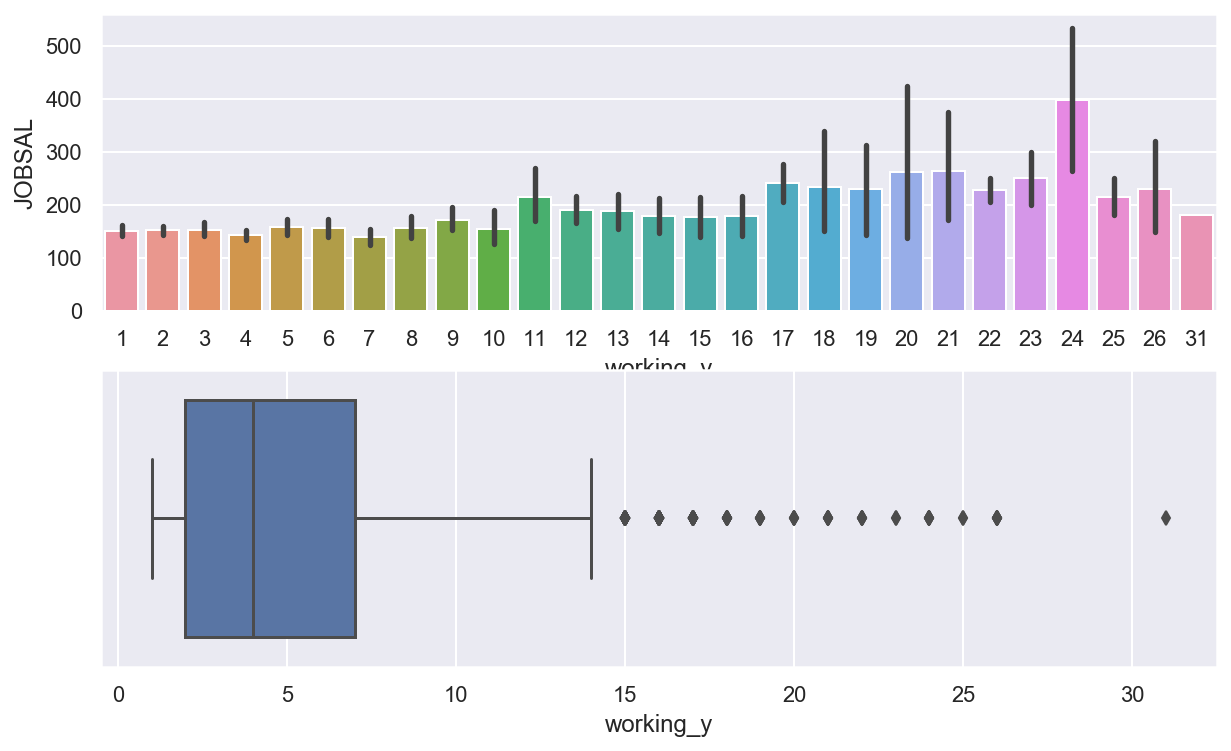

In [66]:
# 경력별 월급 확인-> 24년의 데이터가 이상 upper fence로 drop
plt.figure(figsize=(10, 6))

plt.subplot(211)
sns.barplot(x="working_y", y='JOBSAL', data = data_fin_drop)

plt.subplot(212)
sns.boxplot(data_fin_drop['working_y'])

plt.show()

In [67]:
np.percentile(data_fin_drop['working_y'], 75), np.percentile(data_fin_drop['working_y'], 25)
np.percentile(data_fin_drop['working_y'], 75)+1.5*(np.percentile(data_fin_drop['working_y'], 75)- np.percentile(data_fin_drop['working_y'], 25))
# upper fence=14.5

14.5

In [68]:
data_fin_1 = data_fin_drop[data_fin_drop['working_y'] < 14.5]

In [69]:
fig3 = px.histogram(data_fin_1, x='working_y')
fig3.show()

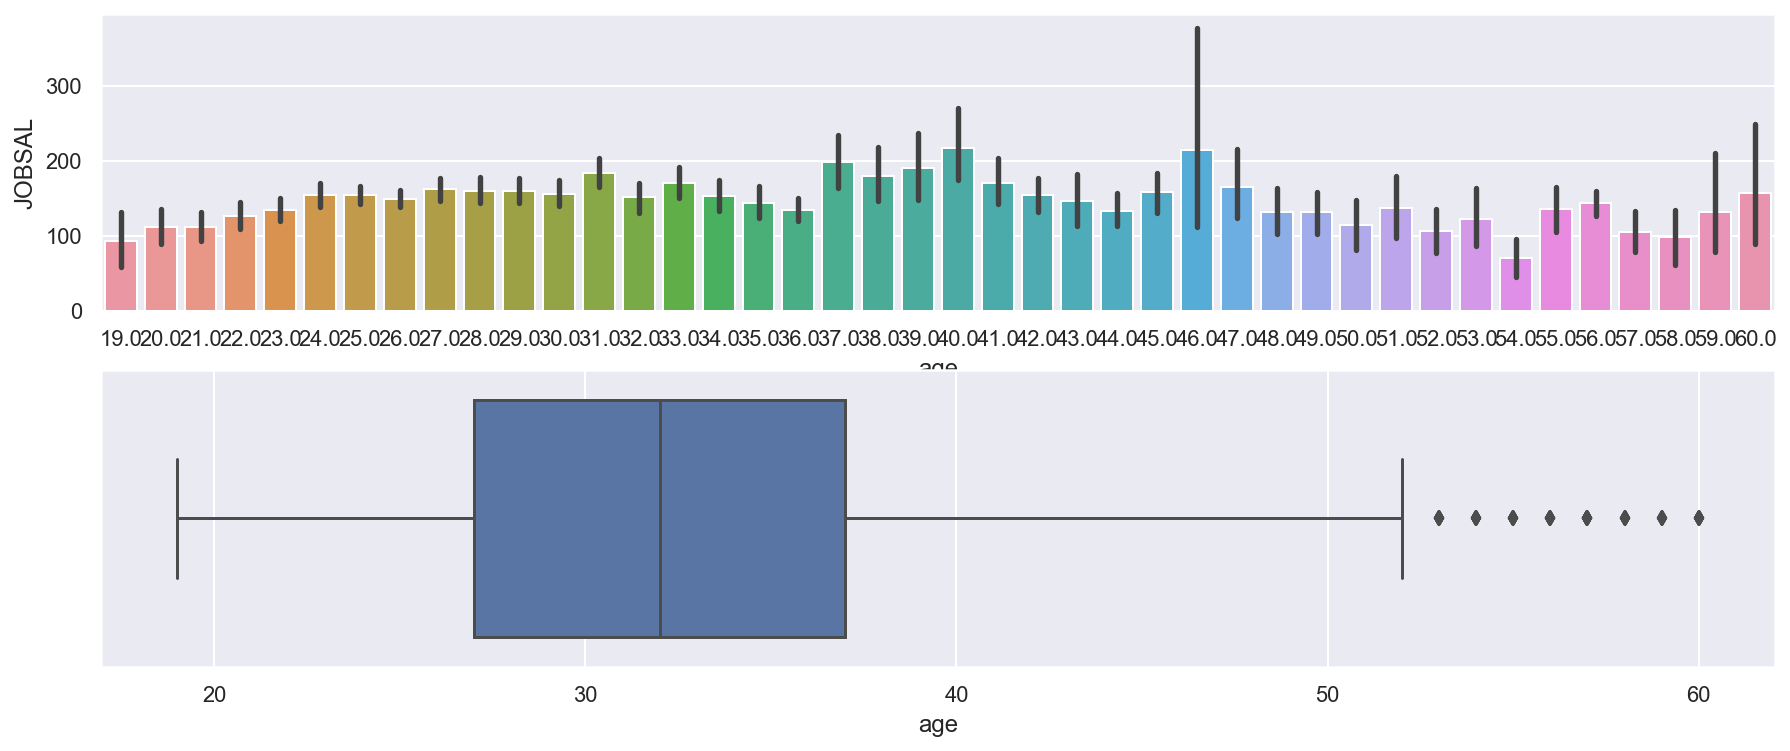

In [71]:
plt.figure(figsize=(15, 6))

plt.subplot(211)
sns.barplot(x="age", y='JOBSAL', data = data_fin_1)

plt.subplot(212)
sns.boxplot(data_fin_1['age'])

plt.show()

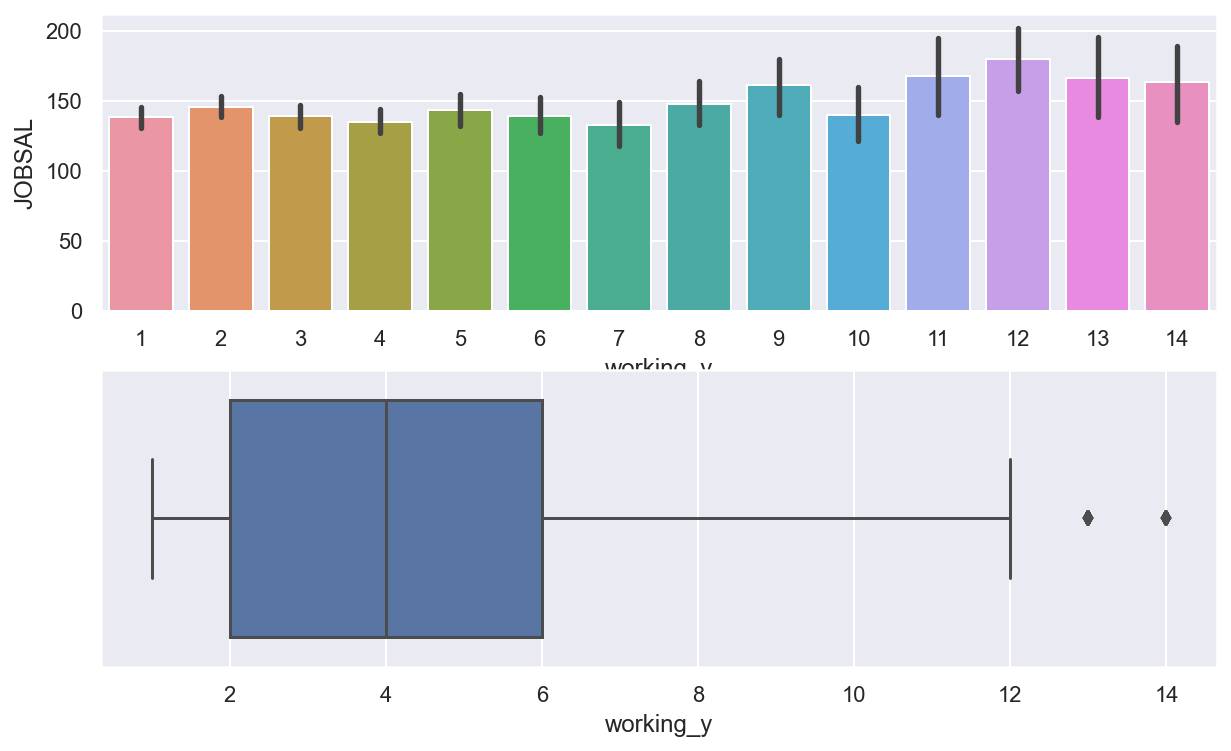

In [133]:
plt.figure(figsize=(10, 6))

plt.subplot(211)
sns.barplot(x="working_y", y='JOBSAL', data = data_fin_1)

plt.subplot(212)
sns.boxplot(data_fin_1['working_y'])

plt.show()

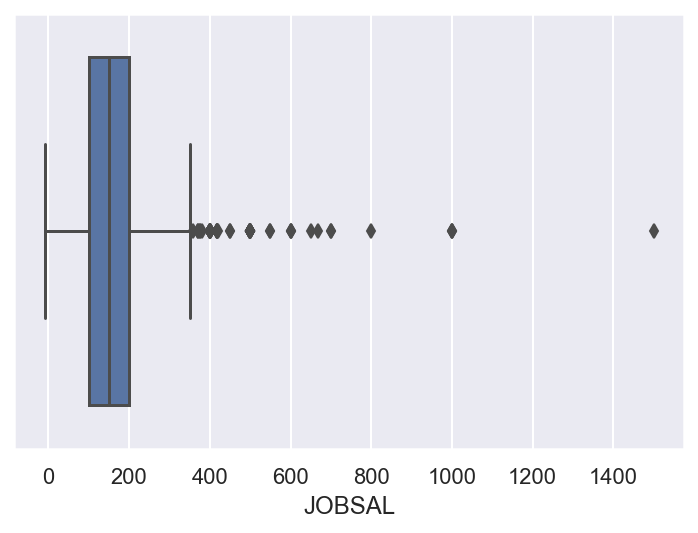

In [70]:
sns.boxplot(data_fin_1['JOBSAL'])

plt.show()

In [71]:
np.percentile(data_fin_1['JOBSAL'], 75), np.percentile(data_fin_1['JOBSAL'], 25)
np.percentile(data_fin_1['JOBSAL'], 75)+1.5*(np.percentile(data_fin_1['JOBSAL'], 75)- np.percentile(data_fin_1['JOBSAL'], 25))
# upper fence=350

350.0

In [72]:
data_fin_1 = data_fin_1[data_fin_1['JOBSAL'] < 350]

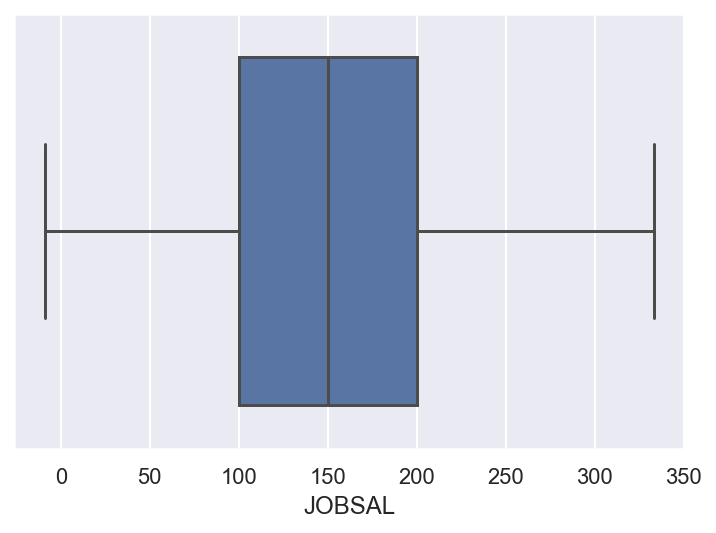

In [73]:
sns.boxplot(data_fin_1['JOBSAL'])

plt.show()

In [74]:
data_fin_1.columns

Index(['case', 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'age', 'edu',
       'marry_YN', 'hschool', 'univ_mjor', 'univ_area', 'jung_bi', 'level',
       'j_type', 'job_pp', 'job_1_in', 'JOBSAL', 'working_y'],
      dtype='object')

In [75]:
data_fin_1.drop(['job_1_in'], axis=1, inplace=True)

# <span style="color:blue"> 전처리 다하고 확인용입니당</span>

## *전처리 총 정리*
- 범주형 컬럼 총 13개 -> boxplot으로 확인(음수데이터 여부)
- 수치형 컬럼 총 2개 -> regplot으로 확인(선형성 여부)

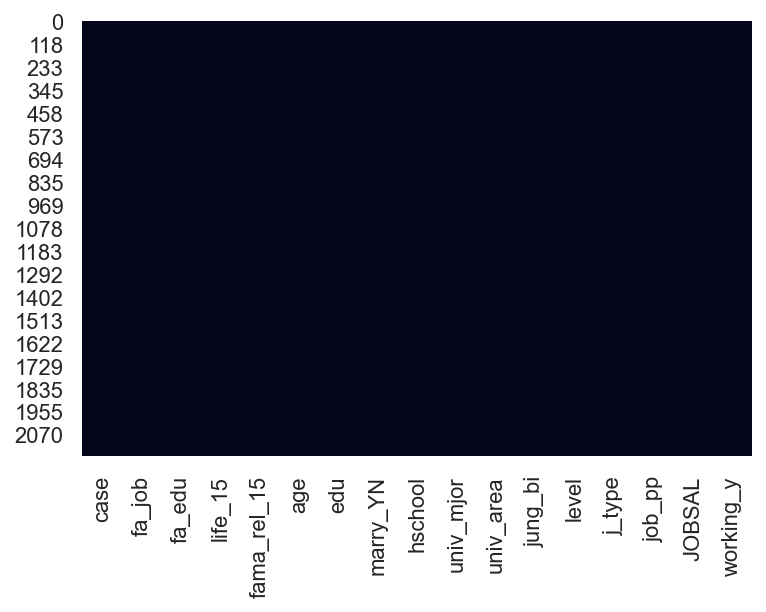

In [76]:
sns.heatmap(data_fin_1.isnull(), cbar=False)

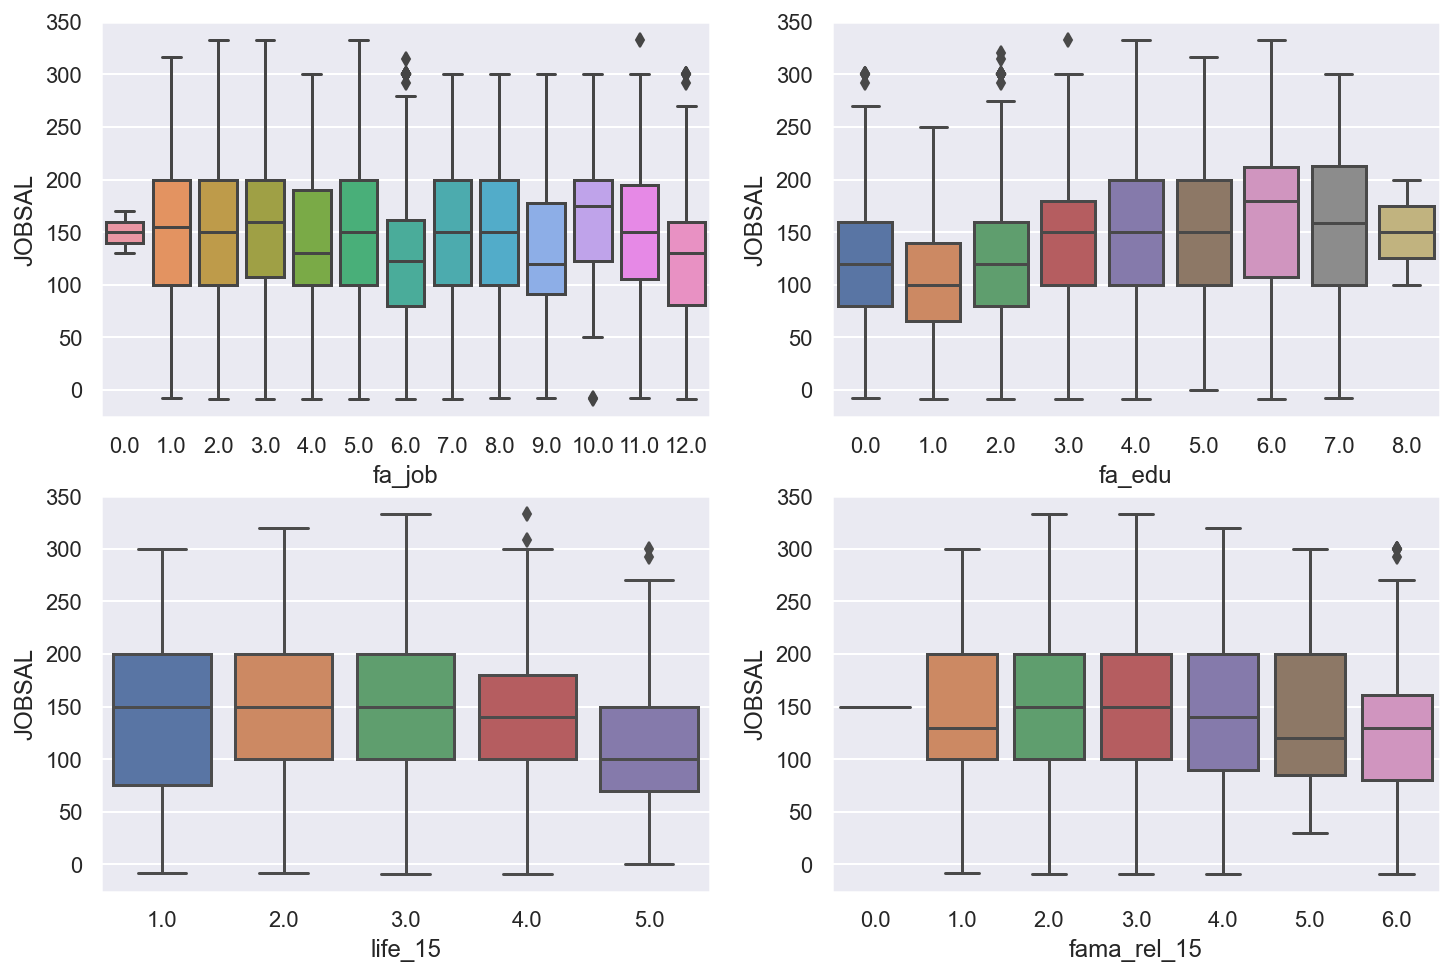

In [77]:
plt.figure(figsize=(12, 8))
plt.subplot(221)
sns.boxplot(x="fa_job", y='JOBSAL', data=data_fin_1)
plt.subplot(222)
sns.boxplot(x="fa_edu", y='JOBSAL', data=data_fin_1)
plt.subplot(223)
sns.boxplot(x="life_15", y='JOBSAL', data=data_fin_1)
plt.subplot(224)
sns.boxplot(x="fama_rel_15", y='JOBSAL', data=data_fin_1)


plt.show()

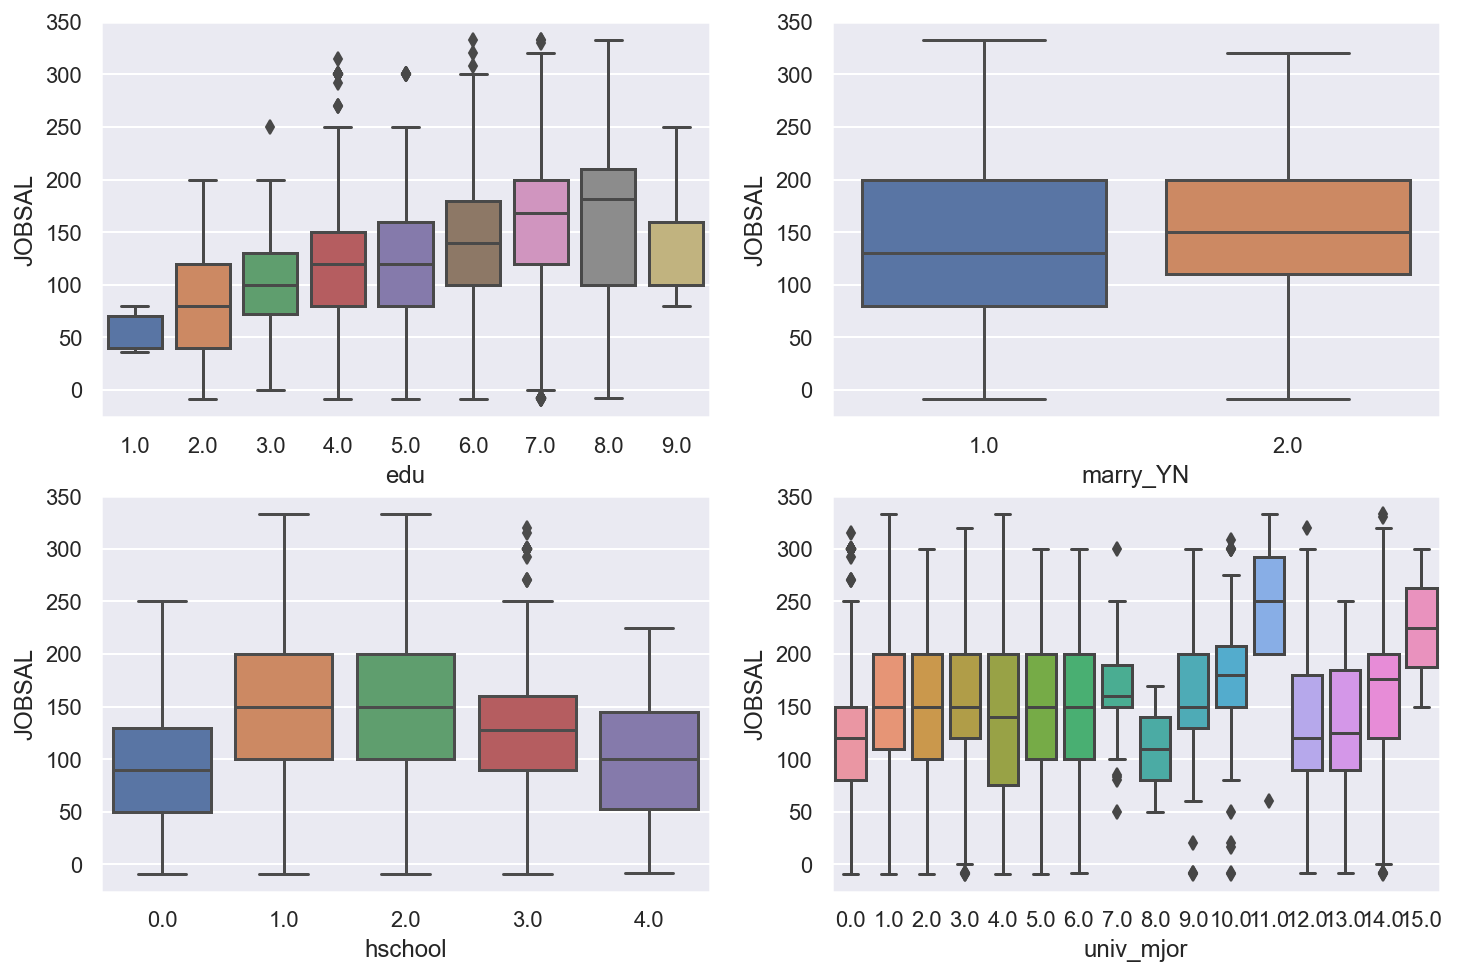

In [78]:
plt.figure(figsize=(12, 8))
plt.subplot(221)
sns.boxplot(x="edu", y='JOBSAL', data=data_fin_1)
plt.subplot(222)
sns.boxplot(x="marry_YN", y='JOBSAL', data=data_fin_1)
plt.subplot(223)
sns.boxplot(x="hschool", y='JOBSAL', data=data_fin_1)
plt.subplot(224)
sns.boxplot(x="univ_mjor", y='JOBSAL', data=data_fin_1)


plt.show()

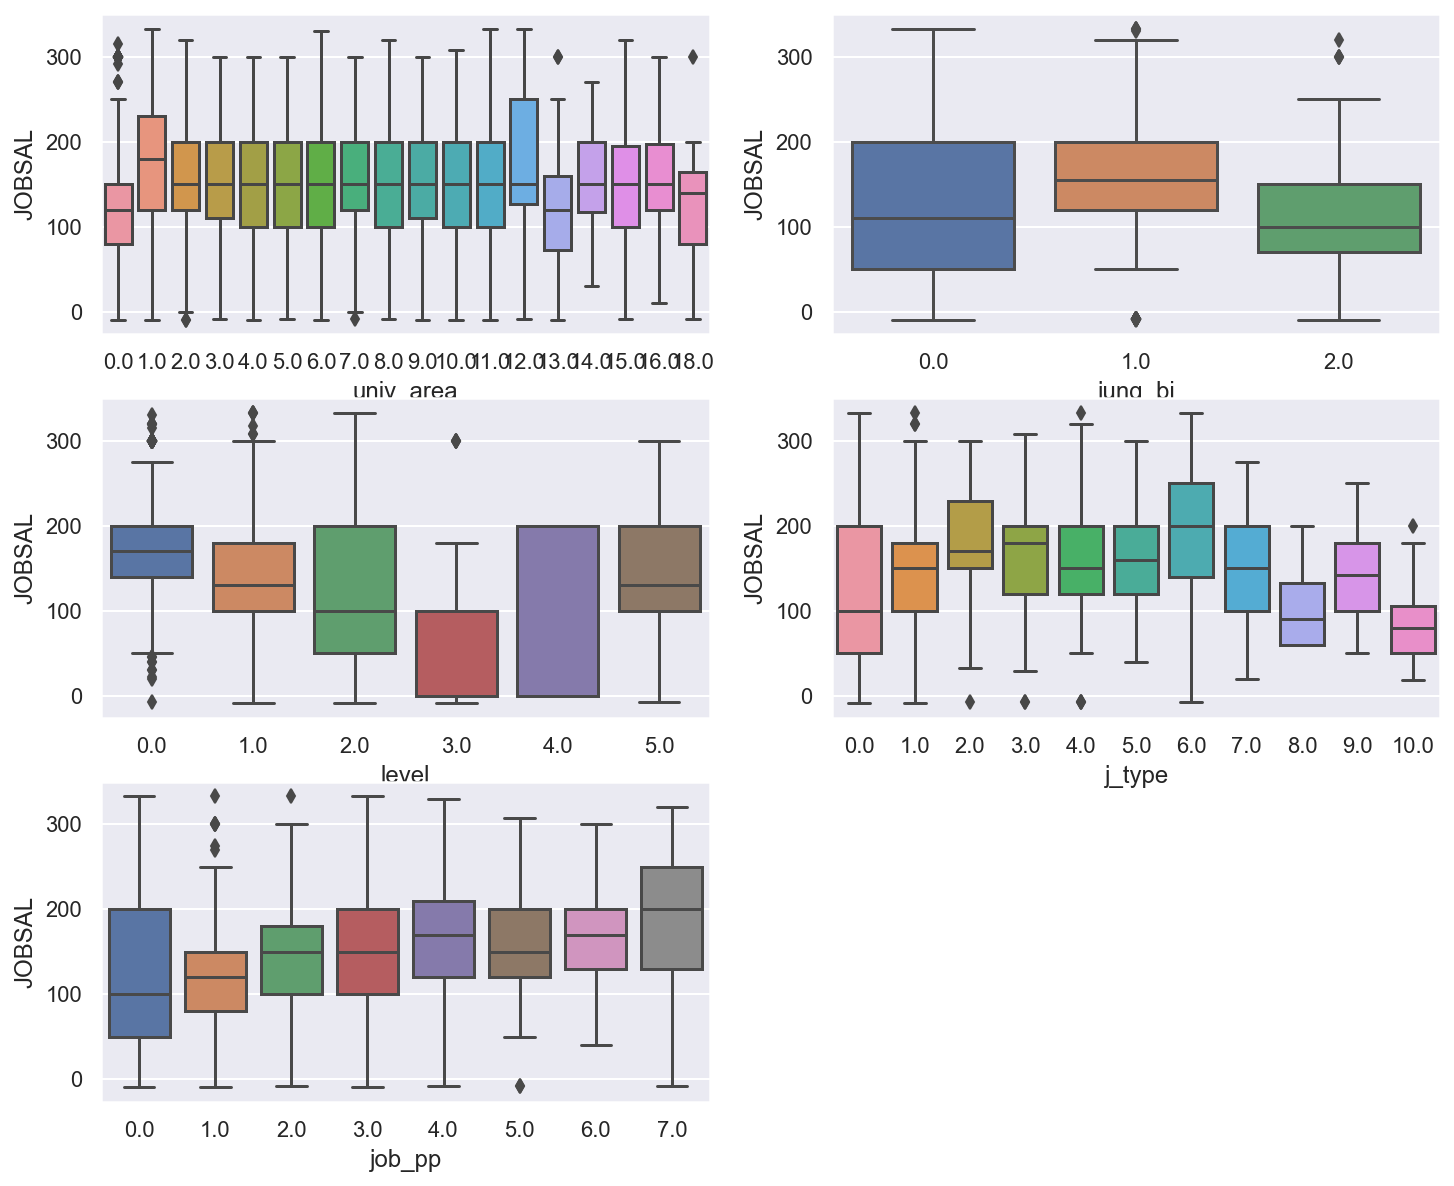

In [79]:
plt.figure(figsize=(12, 10))
plt.subplot(321)
sns.boxplot(x="univ_area", y='JOBSAL', data=data_fin_1)
plt.subplot(322)
sns.boxplot(x="jung_bi", y='JOBSAL', data=data_fin_1)
plt.subplot(323)
sns.boxplot(x="level", y='JOBSAL', data=data_fin_1)
plt.subplot(324)
sns.boxplot(x="j_type", y='JOBSAL', data=data_fin_1)
plt.subplot(325)
sns.boxplot(x="job_pp", y='JOBSAL', data=data_fin_1)


plt.show()

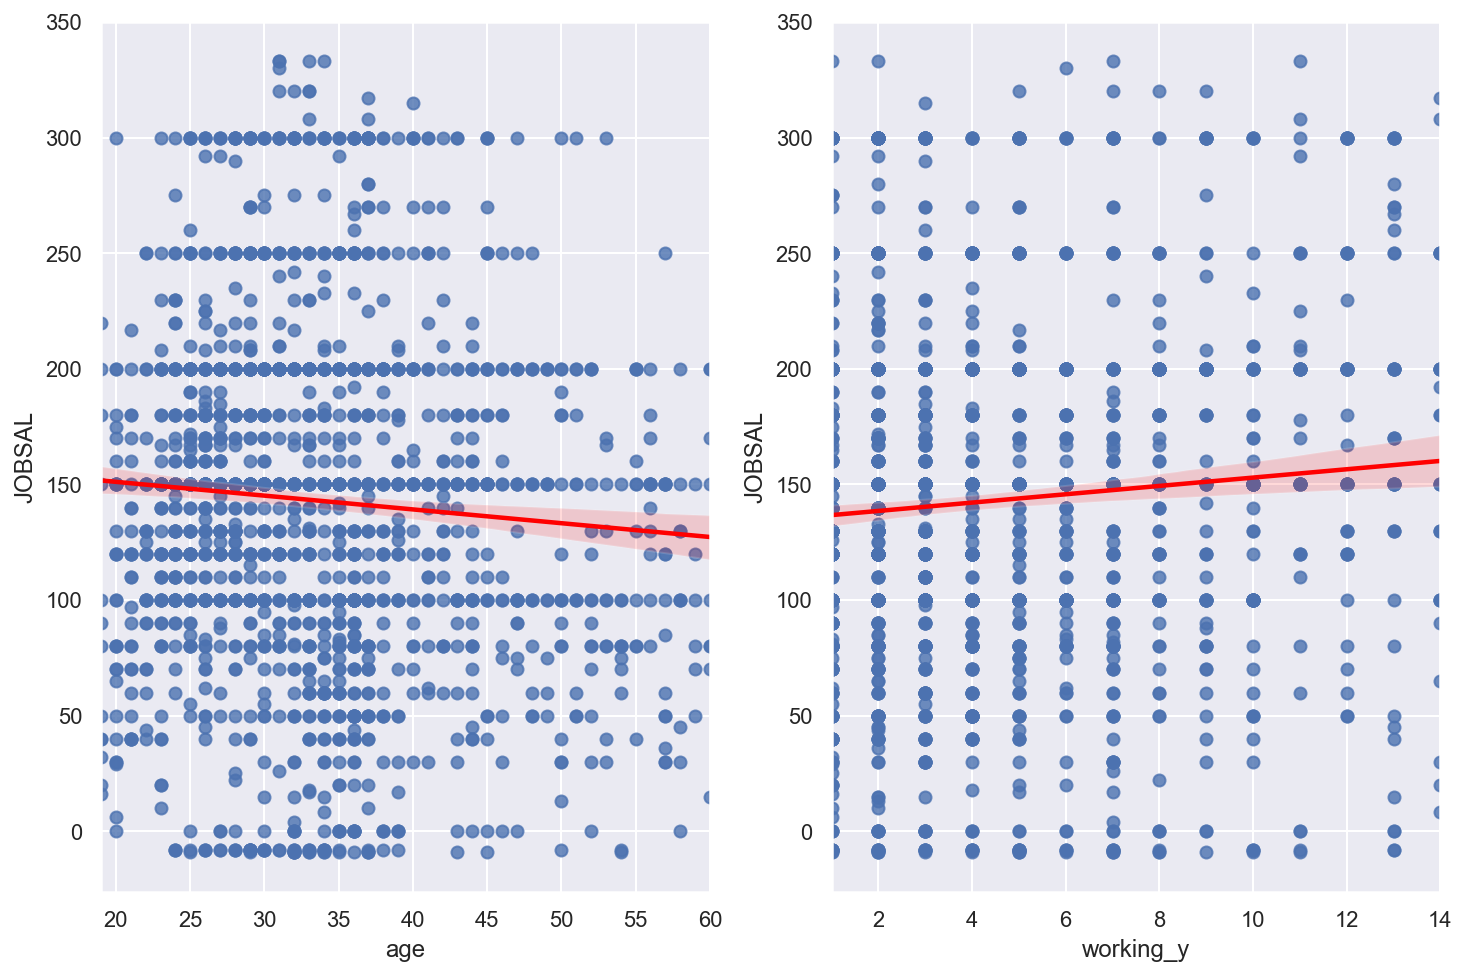

In [80]:
plt.figure(figsize=(12, 8))
plt.subplot(121)
sns.regplot(x="age", y='JOBSAL', data=data_fin_1, line_kws={'color':'red'})
plt.subplot(122)
sns.regplot(x="working_y", y='JOBSAL', data=data_fin_1, line_kws={'color':'red'})

plt.show()

## 범주형 변수 추려내기 

- 범주형 컬럼 : 'fa_job', 'fa_edu', 'life_15', 'fama_rel_15', 'edu', 'marry_YN', 'hschool', 'univ_mjor', 'univ_area', 'jung_bi', 'level', 'j_type', 'job_pp' 
- 수치형 컬럼 : 'age', 'working_y'
- 종속변수 : 'JOBSAL'

In [81]:
data_dummy = pd.get_dummies(data_fin_1, columns=['fa_job', 'fa_edu', 'life_15', 'fama_rel_15'
                                                 , 'edu', 'marry_YN', 'hschool', 'univ_mjor'
                                                 , 'univ_area', 'jung_bi', 'level', 'j_type', 'job_pp'])

In [82]:
data_dummy.tail()

case   age  JOBSAL  working_y  fa_job_0.0  fa_job_1.0  fa_job_2.0  \
2172   6.0  47.0   200.0          2           0           0           0   
2173   6.0  36.0   250.0          3           0           0           0   
2174   6.0  36.0   200.0          5           0           0           0   
2175   6.0  42.0    60.0          6           0           0           0   
2176   6.0  28.0   250.0          3           0           0           0   

      fa_job_3.0  fa_job_4.0  fa_job_5.0  ...  j_type_9.0  j_type_10.0  \
2172           0           0           0  ...           0            0   
2173           0           0           0  ...           0            0   
2174           0           0           0  ...           0            0   
2175           0           0           0  ...           0            0   
2176           0           0           0  ...           1            0   

      job_pp_0.0  job_pp_1.0  job_pp_2.0  job_pp_3.0  job_pp_4.0  job_pp_5.0  \
2172           0           0           1           0           0           0   
2173           0           0           0           0           0           1   
2174           0           0           1           0           0           0   
2175           0           1           0           0           0           0   
2176           0           0           0           1           0           0   

      job_pp_6.0  job_pp_7.0  
2172           0           0  
2173           0           0  
2174           0           0  
2175           0           0  
2176           0           0  

[5 rows x 116 columns]

In [83]:
# 사용 모델 리스트 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor)
from xgboost import XGBRegressor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [84]:
# scaler, pipeline, mse, r2 
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

### <span style="color:blue">더미변수 분류한거랑 안한거랑 r2 score 비교해도 좋을꺼같아용</span>

In [85]:
models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
models.append(('XGBRegressor', XGBRegressor()))

In [86]:
models

[('LinearRegression', LinearRegression()),
 ('DecisionTreeRegressor', DecisionTreeRegressor()),
 ('RandomForestRegressor', RandomForestRegressor()),
 ('GradientBoostingRegressor', GradientBoostingRegressor()),
 ('XGBRegressor',
  XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None, gamma=None,
               gpu_id=None, importance_type='gain', interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               random_state=None, reg_alpha=None, reg_lambda=None,
               scale_pos_weight=None, subsample=None, tree_method=None,
               validate_parameters=None, verbosity=None))]

> 1. 범주형 변수 그대로 사용 버젼

In [87]:
data_fin_1

case  fa_job  fa_edu  life_15  fama_rel_15   age  edu  marry_YN  \
0      1.0     5.0     4.0      3.0          2.0  32.0  6.0       1.0   
1      4.0     2.0     6.0      3.0          4.0  19.0  5.0       2.0   
2      4.0     7.0     3.0      3.0          3.0  19.0  4.0       2.0   
3      3.0     7.0     4.0      3.0          3.0  31.0  7.0       2.0   
4      1.0     3.0     5.0      3.0          2.0  25.0  7.0       2.0   
...    ...     ...     ...      ...          ...   ...  ...       ...   
2172   6.0     7.0     4.0      3.0          3.0  47.0  7.0       1.0   
2173   6.0    12.0     0.0      2.0          6.0  36.0  7.0       1.0   
2174   6.0     8.0     3.0      3.0          3.0  36.0  4.0       1.0   
2175   6.0     6.0     2.0      4.0          3.0  42.0  4.0       1.0   
2176   6.0     7.0     4.0      3.0          2.0  28.0  8.0       2.0   

      hschool  univ_mjor  univ_area  jung_bi  level  j_type  job_pp  JOBSAL  \
0         1.0        7.0       15.0      1.0    1.0     1.0     4.0   180.0   
1         1.0        0.0        0.0      2.0    1.0     2.0     2.0    32.0   
2         3.0        0.0        0.0      1.0    1.0     1.0     5.0   220.0   
3         2.0        9.0        1.0      1.0    1.0     1.0     7.0   200.0   
4         1.0        3.0        2.0      1.0    1.0     1.0     7.0   200.0   
...       ...        ...        ...      ...    ...     ...     ...     ...   
2172      1.0        6.0        6.0      1.0    0.0     1.0     2.0   200.0   
2173      1.0       10.0        6.0      1.0    0.0     1.0     5.0   250.0   
2174      3.0        0.0        0.0      1.0    0.0     1.0     2.0   200.0   
2175      3.0        0.0        0.0      2.0    0.0     1.0     1.0    60.0   
2176      1.0       12.0        2.0      1.0    0.0     9.0     3.0   250.0   

      working_y  
0            10  
1             1  
2             1  
3             1  
4             2  
...         ...  
2172          2  
2173          3  
2174          5  
2175          6  
2176          3  

[1971 rows x 17 columns]

In [88]:
X = data_fin_1.drop(['case', 'JOBSAL'], axis=1)
y = data_fin_1['JOBSAL']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=13)

In [89]:
names = []
train_r2_score = []
test_r2_score = []

for name, model in models:
    reg = model
    reg.fit(X_train, y_train)
    
    y_pred_tr = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    names.append(name)
    train_r2_score.append(r2_score(y_train, y_pred_tr))
    test_r2_score.append(r2_score(y_test, y_pred_test))

In [90]:
result_r2 = pd.DataFrame({
    "model_name" : names,
    "train_r2_score" : train_r2_score,
    "test_r2_score" : test_r2_score
})

In [91]:
# 모델은 default일 때 R2
result_r2

model_name  train_r2_score  test_r2_score
0           LinearRegression        0.239686       0.214135
1      DecisionTreeRegressor        1.000000      -0.618213
2      RandomForestRegressor        0.897475       0.194514
3  GradientBoostingRegressor        0.453572       0.253278
4               XGBRegressor        0.956207       0.121899

In [92]:
names = []
train_rmse_score = []
test_rmse_score = []

for name, model in models:
    reg = model
    reg.fit(X_train, y_train)
    
    y_pred_tr = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    names.append(name)
    train_rmse_score.append(np.sqrt(mean_squared_error(y_train, y_pred_tr)))
    test_rmse_score.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

In [93]:
result_rmse = pd.DataFrame({
    "model_name" : names,
    "train_rmse_score" : train_rmse_score,
    "test_rmse_score" : test_rmse_score
})

In [94]:
# 모델은 default일 때 RMSE
result_rmse

model_name  train_rmse_score  test_rmse_score
0           LinearRegression         64.838892        63.914173
1      DecisionTreeRegressor          0.000000        92.919674
2      RandomForestRegressor         24.063009        64.569100
3  GradientBoostingRegressor         54.967432        62.117239
4               XGBRegressor         15.561178        67.560904

In [95]:
# OLS 모델 결과 R2 -> 0.74
ols = sm.OLS(y, X)
result = ols.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 JOBSAL   R-squared (uncentered):                   0.838
Model:                            OLS   Adj. R-squared (uncentered):              0.837
Method:                 Least Squares   F-statistic:                              673.9
Date:                Fri, 28 Aug 2020   Prob (F-statistic):                        0.00
Time:                        13:12:54   Log-Likelihood:                         -11020.
No. Observations:                1971   AIC:                                  2.207e+04
Df Residuals:                    1956   BIC:                                  2.215e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

> 심각한 과적합들 발생.. 하이퍼파라미터 수정 후 재시도

In [96]:
models_tu = []
models_tu.append(('LinearRegression', LinearRegression()))
models_tu.append(('DecisionTreeRegressor', DecisionTreeRegressor(max_depth=5)))
models_tu.append(('RandomForestRegressor', RandomForestRegressor(max_depth=4)))
models_tu.append(('GradientBoostingRegressor', GradientBoostingRegressor(max_depth=4)))
models_tu.append(('XGBRegressor', XGBRegressor(max_depth=3)))

In [97]:
names = []
train_r2_score = []
test_r2_score = []

for name, model in models_tu:
    reg = model
    reg.fit(X_train, y_train)
    
    y_pred_tr = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    names.append(name)
    train_r2_score.append(r2_score(y_train, y_pred_tr))
    test_r2_score.append(r2_score(y_test, y_pred_test))

In [98]:
result_r2_1 = pd.DataFrame({
    "model_name" : names,
    "train_r2_score" : train_r2_score,
    "test_r2_score" : test_r2_score
})

In [99]:
# 모델 max_depth만 변경한 R2
result_r2_1

model_name  train_r2_score  test_r2_score
0           LinearRegression        0.239686       0.214135
1      DecisionTreeRegressor        0.327282       0.154695
2      RandomForestRegressor        0.329732       0.228096
3  GradientBoostingRegressor        0.586459       0.230017
4               XGBRegressor        0.589121       0.203699

In [100]:
# 모델 default일 때 R2
result_r2

model_name  train_r2_score  test_r2_score
0           LinearRegression        0.239686       0.214135
1      DecisionTreeRegressor        1.000000      -0.618213
2      RandomForestRegressor        0.897475       0.194514
3  GradientBoostingRegressor        0.453572       0.253278
4               XGBRegressor        0.956207       0.121899

In [101]:
names = []
train_rmse_score = []
test_rmse_score = []

for name, model in models_tu:
    reg = model
    reg.fit(X_train, y_train)
    
    y_pred_tr = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    names.append(name)
    train_rmse_score.append(np.sqrt(mean_squared_error(y_train, y_pred_tr)))
    test_rmse_score.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

In [102]:
result_rmse_1 = pd.DataFrame({
    "model_name" : names,
    "train_rmse_score" : train_rmse_score,
    "test_rmse_score" : test_rmse_score
})

In [103]:
# 모델 max_depth만 변경한 RMSE
result_rmse_1

model_name  train_rmse_score  test_rmse_score
0           LinearRegression         64.838892        63.914173
1      DecisionTreeRegressor         60.989577        66.287240
2      RandomForestRegressor         60.714989        62.962210
3  GradientBoostingRegressor         47.818781        63.318997
4               XGBRegressor         47.664587        64.337156

In [104]:
# 모델 default일 때 RMSE
result_rmse

model_name  train_rmse_score  test_rmse_score
0           LinearRegression         64.838892        63.914173
1      DecisionTreeRegressor          0.000000        92.919674
2      RandomForestRegressor         24.063009        64.569100
3  GradientBoostingRegressor         54.967432        62.117239
4               XGBRegressor         15.561178        67.560904

> 2. get_dummies 사용한 버젼 

In [105]:
data_dummy

case   age  JOBSAL  working_y  fa_job_0.0  fa_job_1.0  fa_job_2.0  \
0      1.0  32.0   180.0         10           0           0           0   
1      4.0  19.0    32.0          1           0           0           1   
2      4.0  19.0   220.0          1           0           0           0   
3      3.0  31.0   200.0          1           0           0           0   
4      1.0  25.0   200.0          2           0           0           0   
...    ...   ...     ...        ...         ...         ...         ...   
2172   6.0  47.0   200.0          2           0           0           0   
2173   6.0  36.0   250.0          3           0           0           0   
2174   6.0  36.0   200.0          5           0           0           0   
2175   6.0  42.0    60.0          6           0           0           0   
2176   6.0  28.0   250.0          3           0           0           0   

      fa_job_3.0  fa_job_4.0  fa_job_5.0  ...  j_type_9.0  j_type_10.0  \
0              0           0           1  ...           0            0   
1              0           0           0  ...           0            0   
2              0           0           0  ...           0            0   
3              0           0           0  ...           0            0   
4              1           0           0  ...           0            0   
...          ...         ...         ...  ...         ...          ...   
2172           0           0           0  ...           0            0   
2173           0           0           0  ...           0            0   
2174           0           0           0  ...           0            0   
2175           0           0           0  ...           0            0   
2176           0           0           0  ...           1            0   

      job_pp_0.0  job_pp_1.0  job_pp_2.0  job_pp_3.0  job_pp_4.0  job_pp_5.0  \
0              0           0           0           0           1           0   
1              0           0           1           0           0           0   
2              0           0           0           0           0           1   
3              0           0           0           0           0           0   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
2172           0           0           1           0           0           0   
2173           0           0           0           0           0           1   
2174           0           0           1           0           0           0   
2175           0           1           0           0           0           0   
2176           0           0           0           1           0           0   

      job_pp_6.0  job_pp_7.0  
0              0           0  
1              0           0  
2              0           0  
3              0           1  
4              0           1  
...          ...         ...  
2172           0           0  
2173           0           0  
2174           0           0  
2175           0           0  
2176           0           0  

[1971 rows x 116 columns]

In [106]:
X = data_dummy.drop(['case', 'JOBSAL'], axis=1)
y = data_dummy['JOBSAL']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=13)

In [107]:
names = []
train_r2_score = []
test_r2_score = []

for name, model in models:
    reg = model
    reg.fit(X_train, y_train)
    
    y_pred_tr = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    names.append(name)
    train_r2_score.append(r2_score(y_train, y_pred_tr))
    test_r2_score.append(r2_score(y_test, y_pred_test))

In [108]:
result_dum_r2 = pd.DataFrame({
    "model_name" : names,
    "train_r2_score" : train_r2_score,
    "test_r2_score" : test_r2_score
})

In [109]:
# 모델 defualt, dummies변수 일 때 R2
result_dum_r2

model_name  train_r2_score  test_r2_score
0           LinearRegression        0.341192       0.243782
1      DecisionTreeRegressor        1.000000      -0.438146
2      RandomForestRegressor        0.895594       0.182584
3  GradientBoostingRegressor        0.479177       0.278477
4               XGBRegressor        0.943287       0.028730

In [110]:
# 모델 defualt, 범주형 변수 일 때 R2
result_r2

model_name  train_r2_score  test_r2_score
0           LinearRegression        0.239686       0.214135
1      DecisionTreeRegressor        1.000000      -0.618213
2      RandomForestRegressor        0.897475       0.194514
3  GradientBoostingRegressor        0.453572       0.253278
4               XGBRegressor        0.956207       0.121899

In [111]:
names = []
train_rmse_score = []
test_rmse_score = []

for name, model in models:
    reg = model
    reg.fit(X_train, y_train)
    
    y_pred_tr = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    names.append(name)
    train_rmse_score.append(np.sqrt(mean_squared_error(y_train, y_pred_tr)))
    test_rmse_score.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

In [112]:
result_dum_rmse = pd.DataFrame({
    "model_name" : names,
    "train_rmse_score" : train_rmse_score,
    "test_rmse_score" : test_rmse_score
})

In [113]:
# 모델 defualt, dummies변수 일 때 RMSE
result_dum_rmse

model_name  train_rmse_score  test_rmse_score
0           LinearRegression         60.355735        62.696996
1      DecisionTreeRegressor          0.000000        85.633145
2      RandomForestRegressor         23.883032        64.862321
3  GradientBoostingRegressor         53.664113        61.485424
4               XGBRegressor         17.708499        71.054792

In [114]:
# 모델 defualt, 범주형 변수 일 때 RMSE
result_rmse

model_name  train_rmse_score  test_rmse_score
0           LinearRegression         64.838892        63.914173
1      DecisionTreeRegressor          0.000000        92.919674
2      RandomForestRegressor         24.063009        64.569100
3  GradientBoostingRegressor         54.967432        62.117239
4               XGBRegressor         15.561178        67.560904

In [115]:
# dummies 변수일 떄 R2 -> 0.23
ols = sm.OLS(y, X)
result = ols.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 JOBSAL   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     9.500
Date:                Fri, 28 Aug 2020   Prob (F-statistic):          1.08e-105
Time:                        13:13:01   Log-Likelihood:                -10881.
No. Observations:                1971   AIC:                         2.196e+04
Df Residuals:                    1872   BIC:                         2.251e+04
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
age                 0.1856      0.274     

In [116]:
names = []
train_r2_score = []
test_r2_score = []

for name, model in models_tu:
    reg = model
    reg.fit(X_train, y_train)
    
    y_pred_tr = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    names.append(name)
    train_r2_score.append(r2_score(y_train, y_pred_tr))
    test_r2_score.append(r2_score(y_test, y_pred_test))

In [117]:
result_dum_r2_1 = pd.DataFrame({
    "model_name" : names,
    "train_r2_score" : train_r2_score,
    "test_r2_score" : test_r2_score
})

In [118]:
# 모델 max_depth 변경, dummy 변수 R2
result_dum_r2_1

model_name  train_r2_score  test_r2_score
0           LinearRegression        0.341192       0.243782
1      DecisionTreeRegressor        0.356806       0.142029
2      RandomForestRegressor        0.327752       0.217846
3  GradientBoostingRegressor        0.596392       0.290183
4               XGBRegressor        0.612709       0.204576

In [119]:
# 모델 defualt, dummy 변수 R2
result_dum_r2

model_name  train_r2_score  test_r2_score
0           LinearRegression        0.341192       0.243782
1      DecisionTreeRegressor        1.000000      -0.438146
2      RandomForestRegressor        0.895594       0.182584
3  GradientBoostingRegressor        0.479177       0.278477
4               XGBRegressor        0.943287       0.028730

In [120]:
names = []
train_rmse_score = []
test_rmse_score = []

for name, model in models_tu:
    reg = model
    reg.fit(X_train, y_train)
    
    y_pred_tr = reg.predict(X_train)
    y_pred_test = reg.predict(X_test)
    
    names.append(name)
    train_rmse_score.append(np.sqrt(mean_squared_error(y_train, y_pred_tr)))
    test_rmse_score.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

In [121]:
result_dum_rmse_1 = pd.DataFrame({
    "model_name" : names,
    "train_rmse_score" : train_rmse_score,
    "test_rmse_score" : test_rmse_score
})

In [122]:
# 모델 max_depth 변경, dummy 변수 RMSE
result_dum_rmse_1

model_name  train_rmse_score  test_rmse_score
0           LinearRegression         60.355735        62.696996
1      DecisionTreeRegressor         59.636209        66.782029
2      RandomForestRegressor         60.997818        63.940583
3  GradientBoostingRegressor         47.240971        60.902879
4               XGBRegressor         46.276207        64.301727

In [123]:
# 모델 defualt, dummy 변수 RMSE
result_dum_rmse

model_name  train_rmse_score  test_rmse_score
0           LinearRegression         60.355735        62.696996
1      DecisionTreeRegressor          0.000000        85.633145
2      RandomForestRegressor         23.883032        64.862321
3  GradientBoostingRegressor         53.664113        61.485424
4               XGBRegressor         17.708499        71.054792

> 더비변수로 바꿔도 R2, RMSE 값에 큰 차이가 없음..

## 컬럼수 줄이기 
- 'jung_bi', 'level', 'j_type', 'job_pp' -> drop하기
- 'univ_area' -> 서울, 수도권 1 / 나머지 0

In [124]:
data_fin_2 = data_fin_1.copy()

In [125]:
data_fin_2.drop(['jung_bi', 'level', 'j_type', 'job_pp', 'job_1_in'], axis=1, inplace=True)

KeyError: "['job_1_in'] not found in axis"

In [ ]:
data_fin_2.columns

In [ ]:
data_dummy_2 = pd.get_dummies(data_fin_2, columns=['fa_job', 'fa_edu', 'life_15', 'fama_rel_15'
                                                 , 'edu', 'marry_YN', 'hschool', 'univ_mjor'
                                                 , 'univ_area'])

In [ ]:
data_dummy_2

In [ ]:
data_dummy_2.columns